In [1]:
!pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [ ]:
pip install yfinance pandas


In [ ]:
# Calculate the percentage change in closing price for each stock
stock_data['Percentage Change'] = stock_data.groupby('Symbol')['Close'].pct_change() * 100

# Calculate the total percentage change for each stock
total_percentage_change = stock_data.groupby('Symbol')['Percentage Change'].sum()

# Sort the stocks based on total percentage change in descending order
top_profitable_stocks = total_percentage_change.sort_values(ascending=False)

# Display the top 10 profitable stocks
print("Top 10 Profitable Stocks:")
print(top_profitable_stocks.head(10))

Top 10 Profitable Stocks:
Symbol
NVDA     199.820279
TSLA     137.362092
META     111.879858
AMZN     100.574274
GOOGL     76.228333
NFLX      74.497428
INTC      70.512378
GE        68.397751
MSFT      60.137138
AAPL      55.221218
Name: Percentage Change, dtype: float64


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

Top 10 Profitable Stocks:
Symbol
NVDA     199.820279
TSLA     137.362092
META     111.879858
AMZN     100.574274
GOOGL     76.228333
NFLX      74.497428
INTC      70.512378
GE        68.397751
MSFT      60.137138
AAPL      55.221218
Name: Percentage Change, dtype: float64


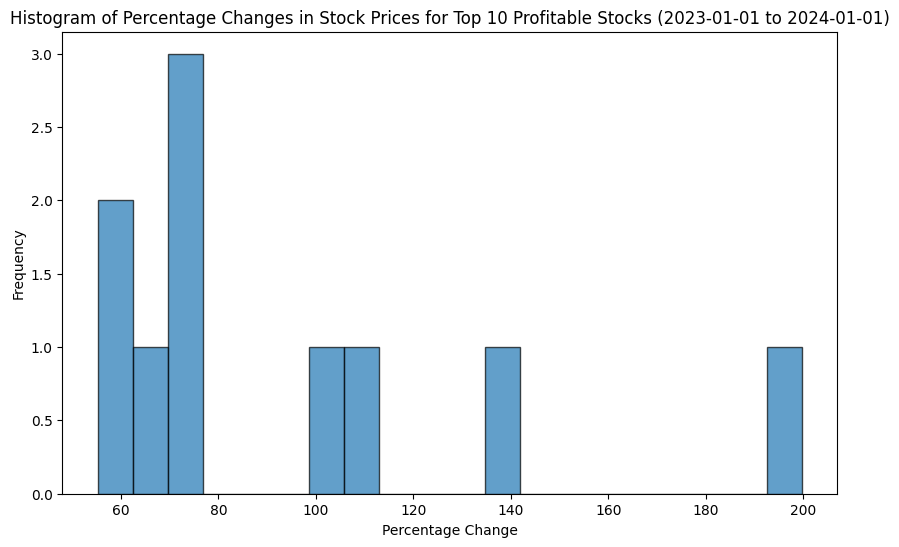

In [ ]:
# Create an empty DataFrame to store the stock data
stock_data = pd.DataFrame()

# Create a dictionary to store stock dataframes
stock_tables = {}

# Loop through the stock symbols and fetch historical data
for symbol in stock_symbols:
    stock = yf.download(symbol, start="2023-01-01", end="2024-01-01")  # Specify the desired start and end dates
    stock['Symbol'] = symbol  # Add a column for the stock symbol
    stock_data = pd.concat([stock_data, stock], axis=0)

    # Store individual stock dataframe
    stock_tables[symbol] = stock

# Calculate the percentage change in closing price for each stock
stock_data['Percentage Change'] = stock_data.groupby('Symbol')['Close'].pct_change() * 100

# Calculate the total percentage change for each stock
total_percentage_change = stock_data.groupby('Symbol')['Percentage Change'].sum()

# Sort the stocks based on total percentage change in descending order
top_profitable_stocks = total_percentage_change.sort_values(ascending=False)

# Display the top 10 profitable stocks
print("Top 10 Profitable Stocks:")
print(top_profitable_stocks.head(10))

# Calculate the percentage change in closing prices for the top 10 profitable stocks
top_10_profitable_symbols = top_profitable_stocks.head(10).index
percentage_changes_top_10 = [total_percentage_change[symbol] for symbol in top_10_profitable_symbols]

# Create a histogram of percentage changes for the top 10 profitable stocks
plt.figure(figsize=(10, 6))
plt.hist(percentage_changes_top_10, bins=20, edgecolor='black', alpha=0.7)
plt.title("Histogram of Percentage Changes in Stock Prices for Top 10 Profitable Stocks (2023-01-01 to 2024-01-01)")
plt.xlabel("Percentage Change")
plt.ylabel("Frequency")
plt.show()

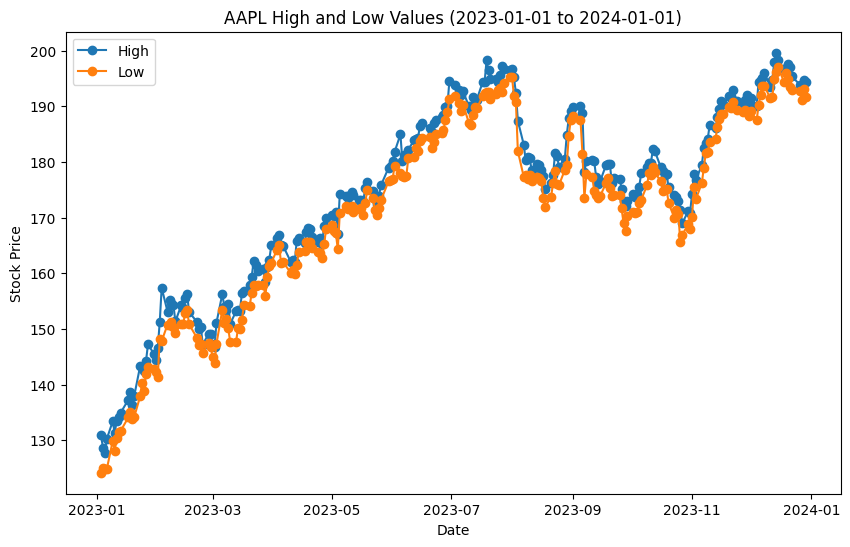

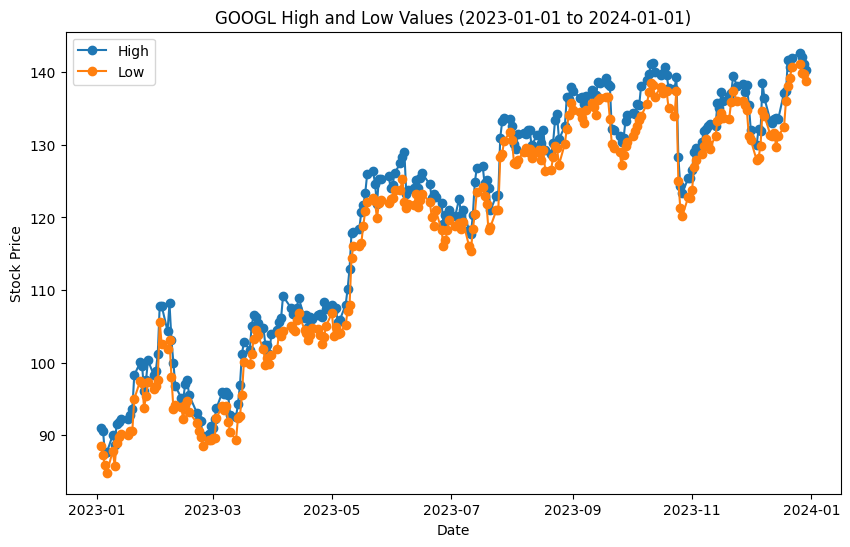

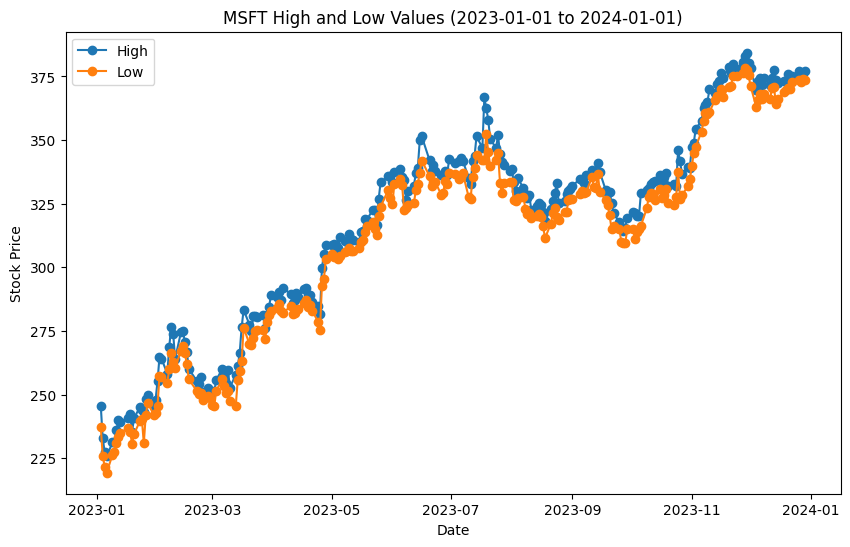

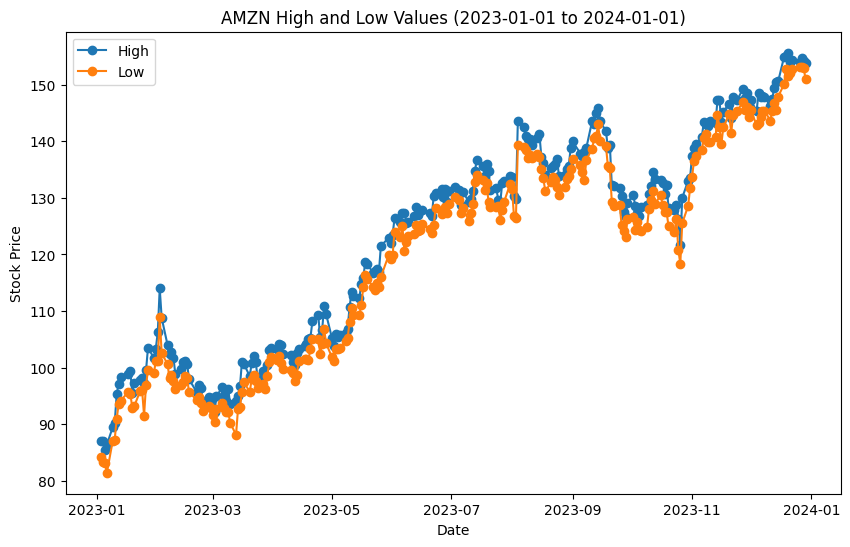

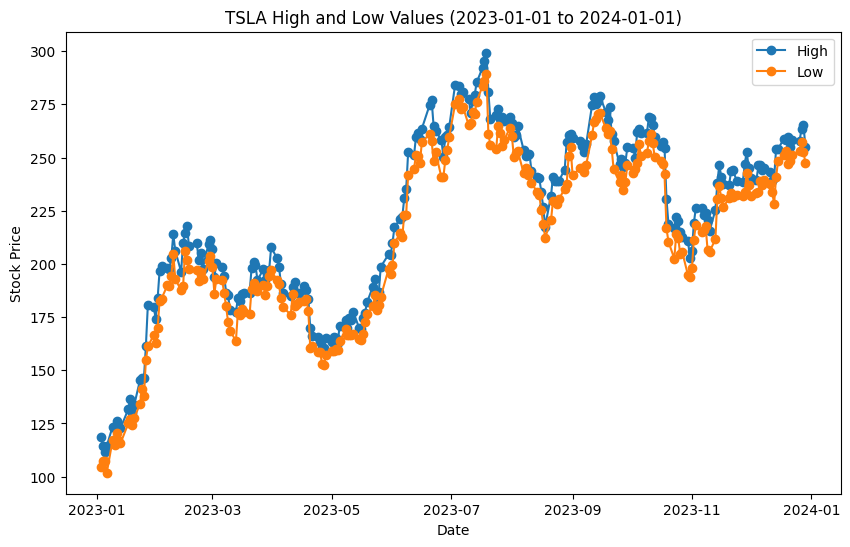

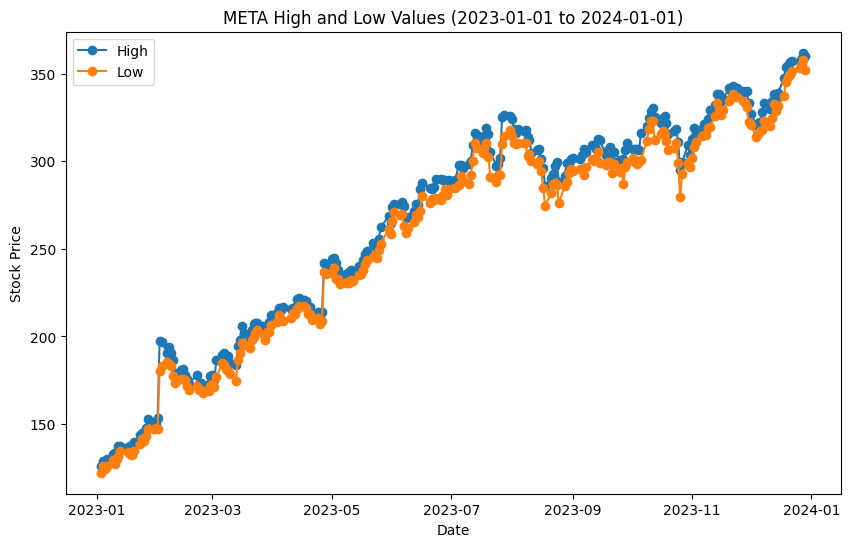

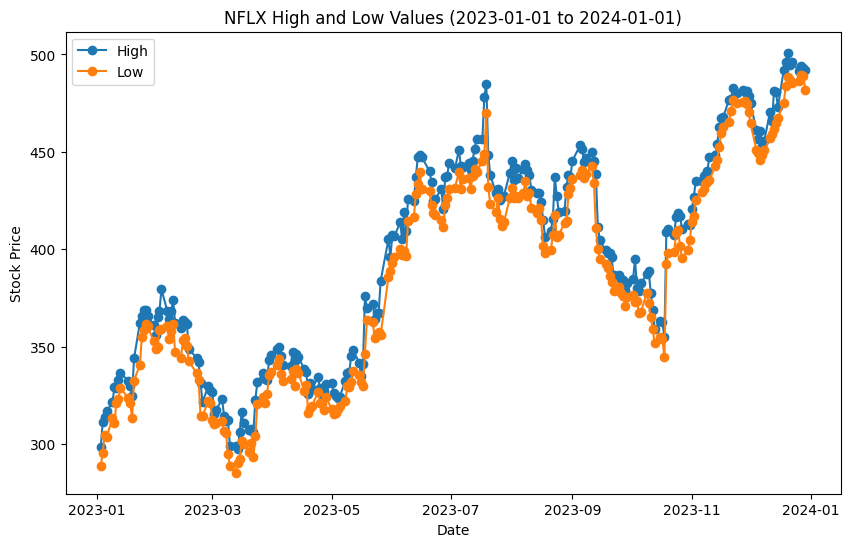

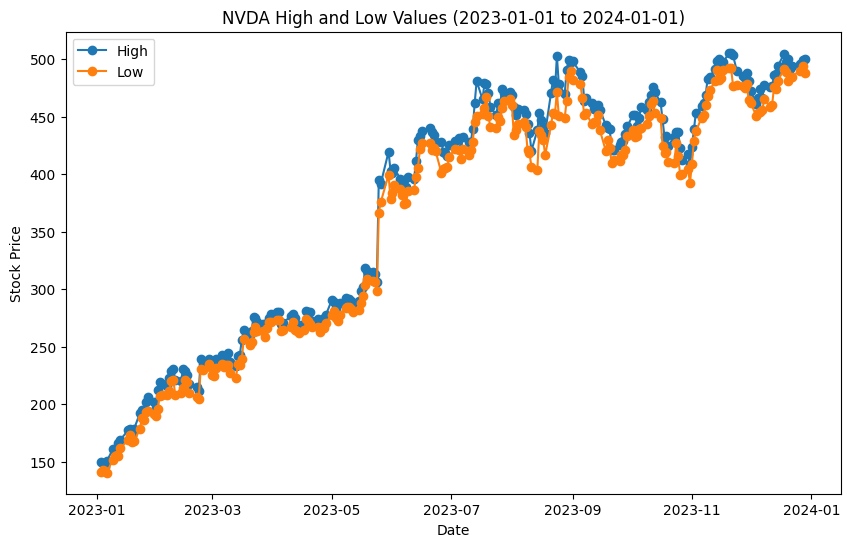

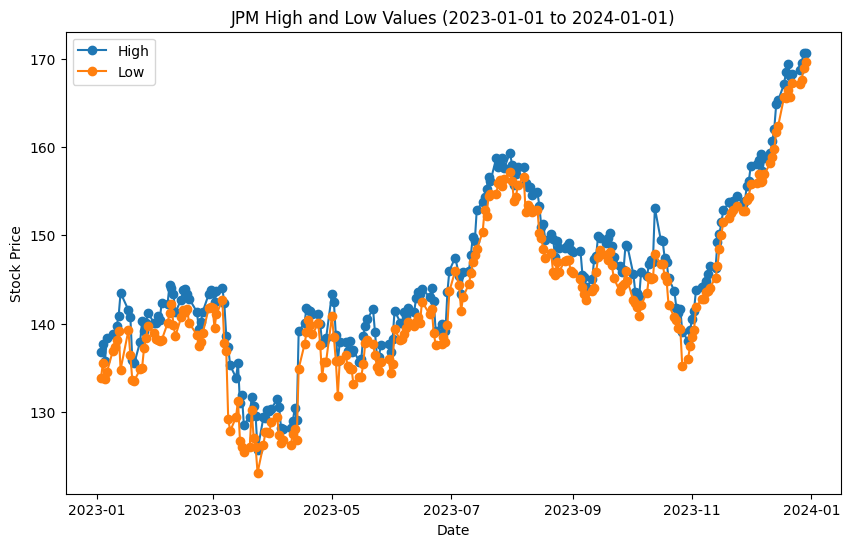

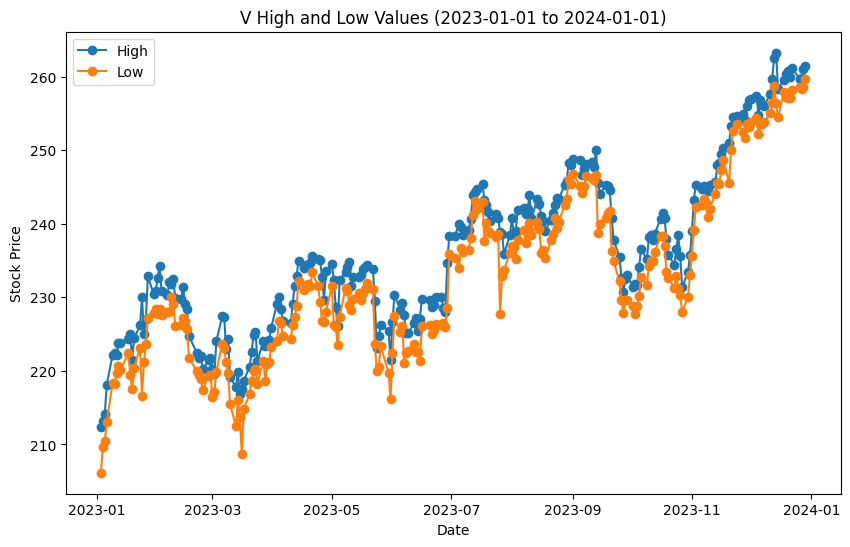

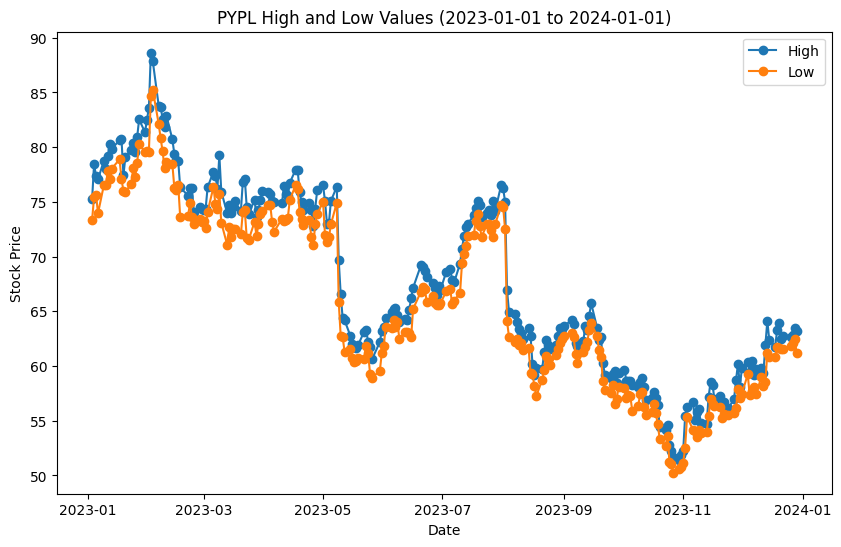

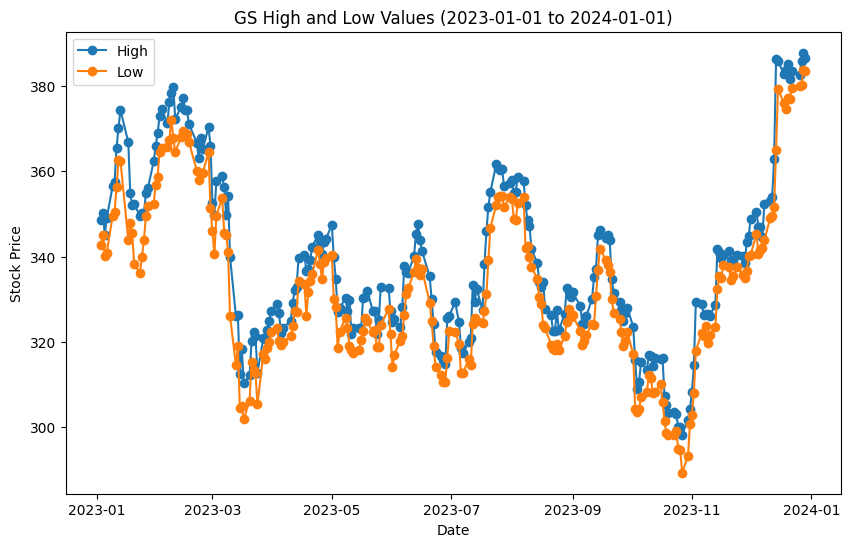

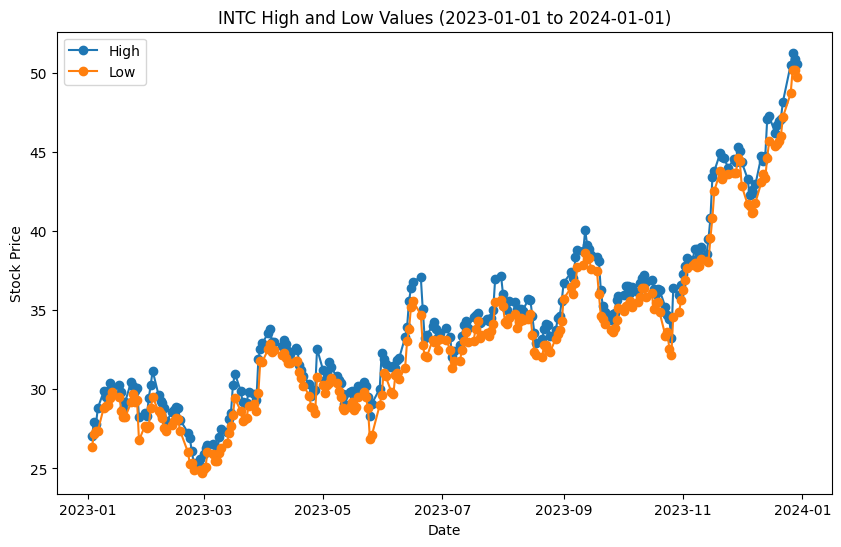

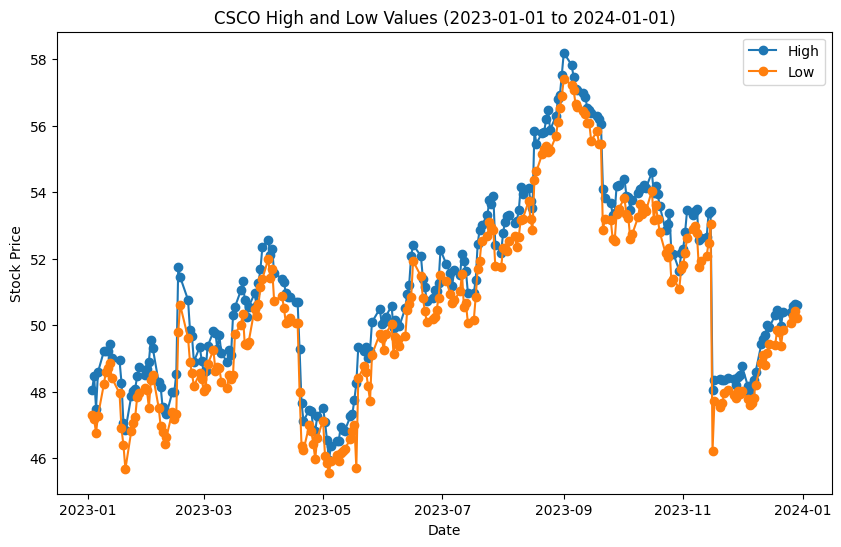

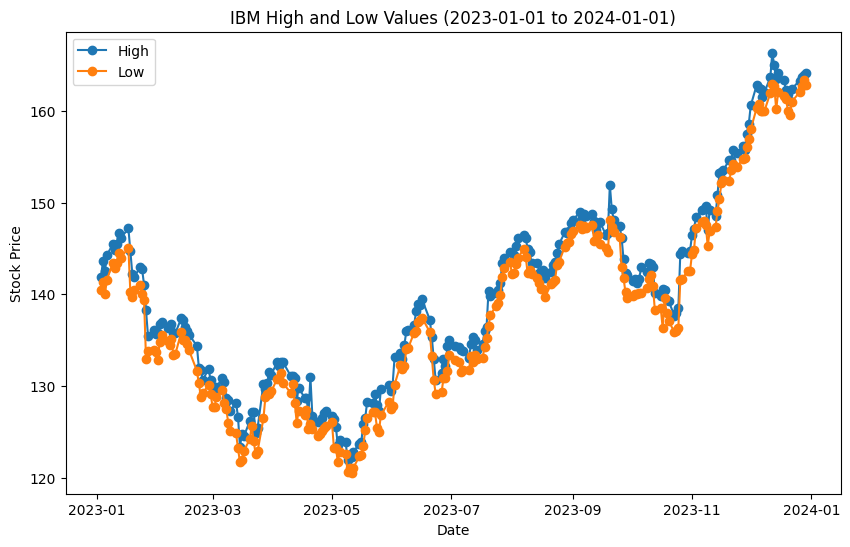

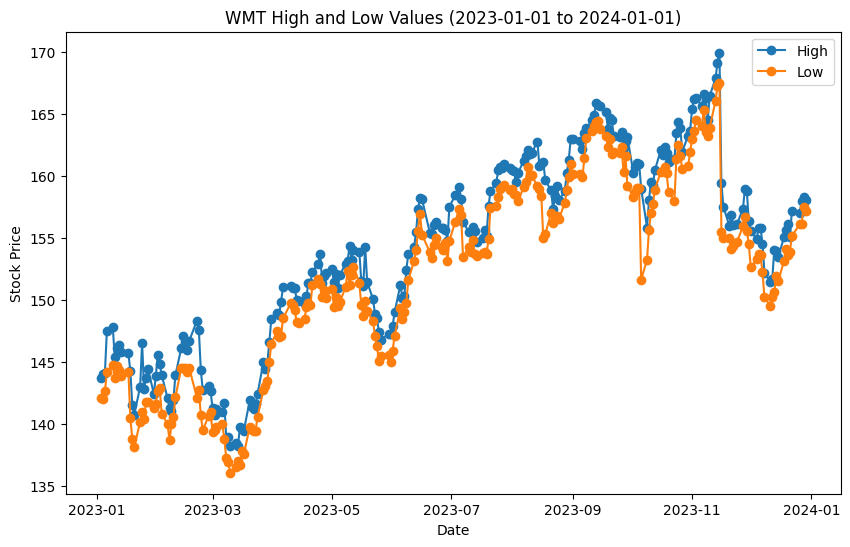

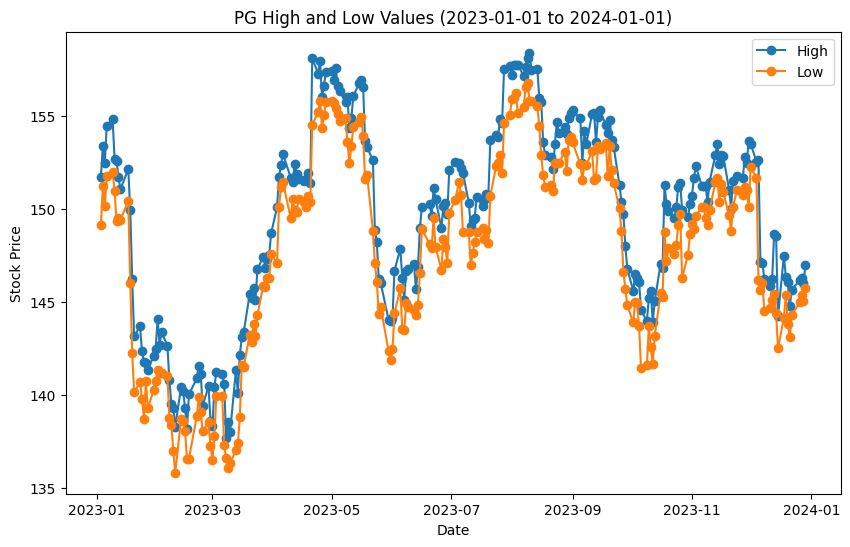

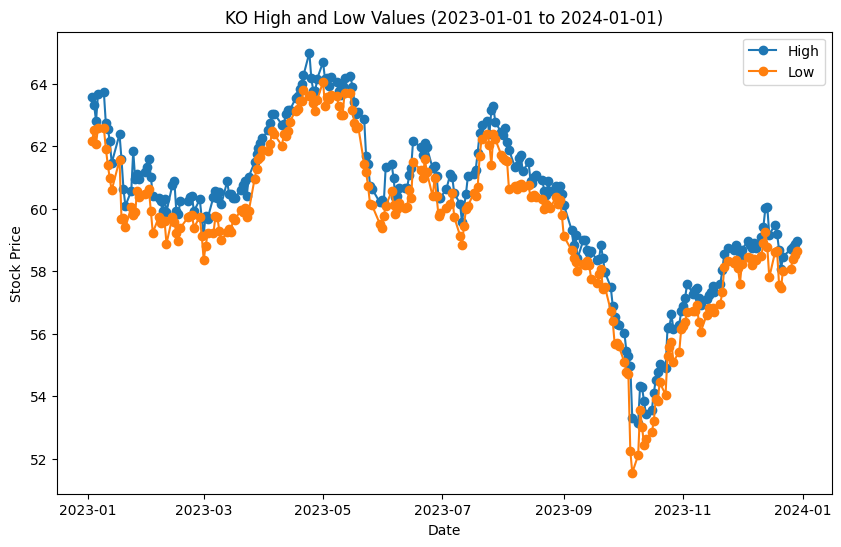

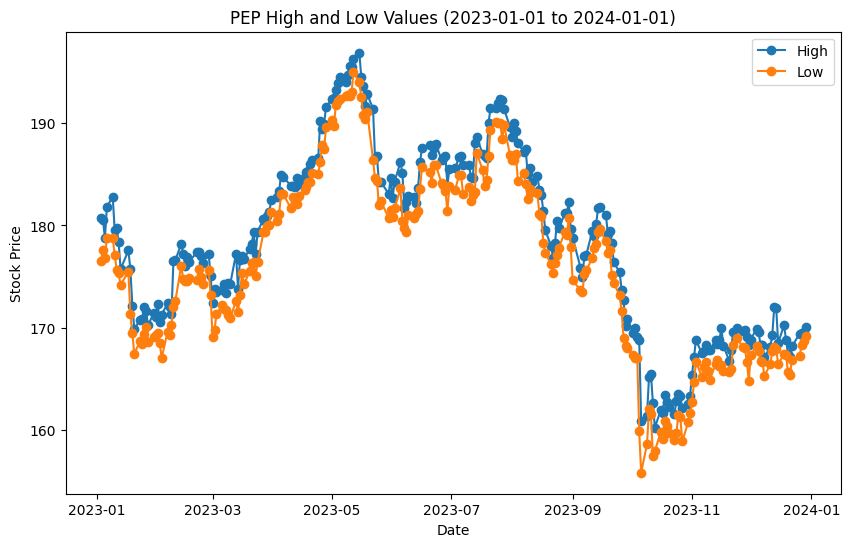

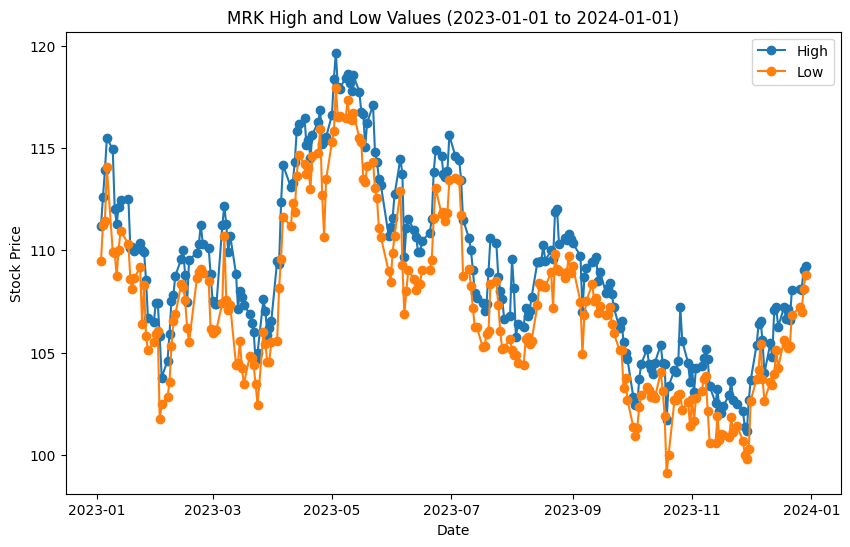

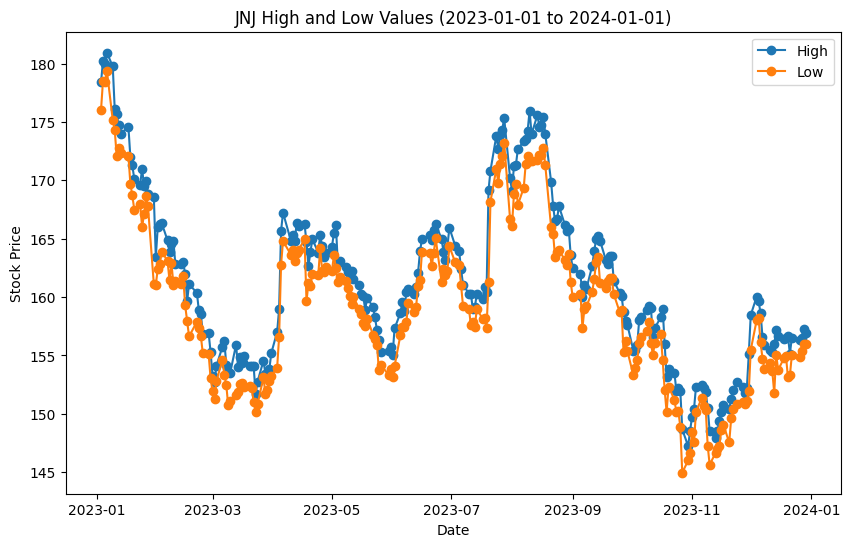

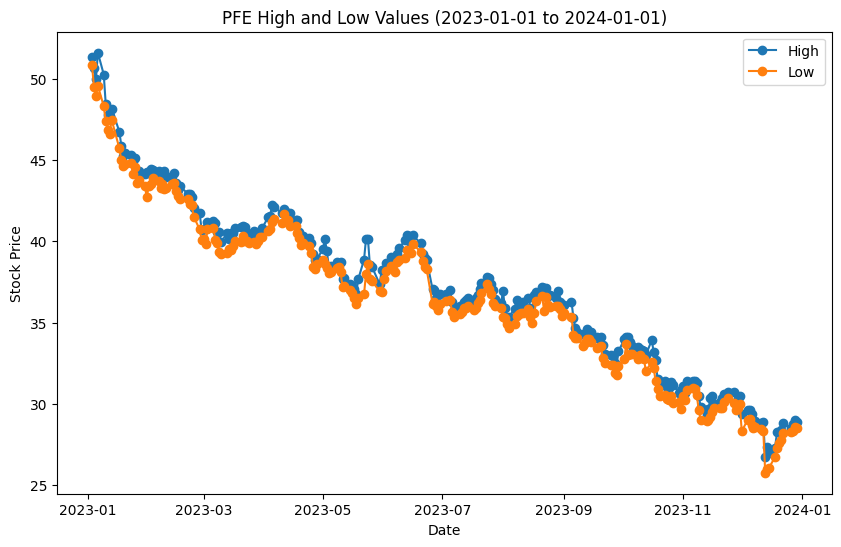

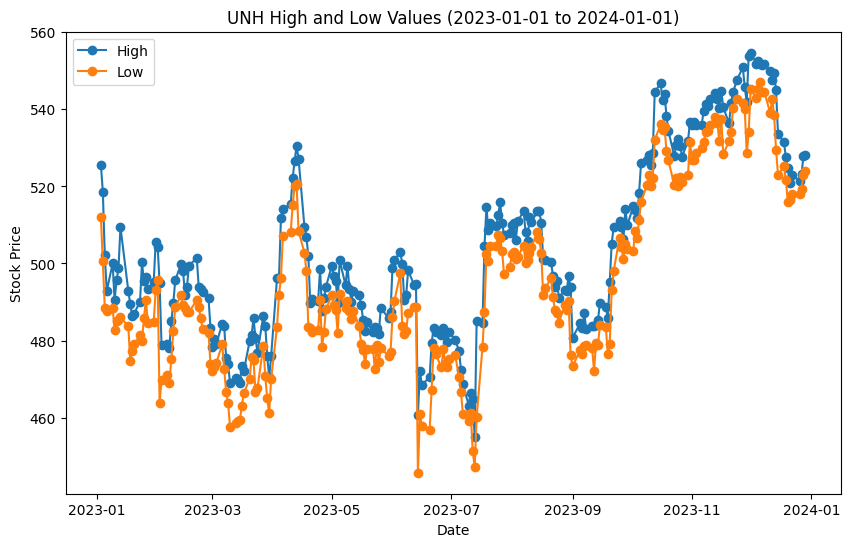

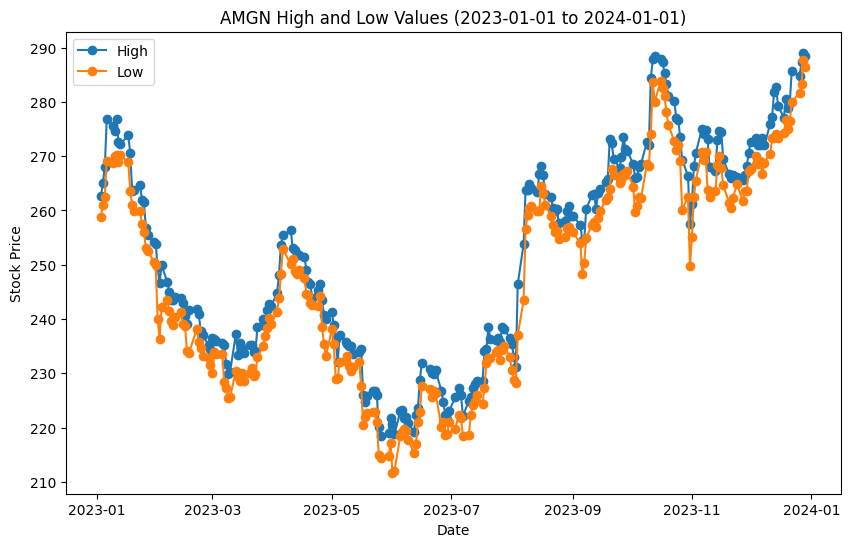

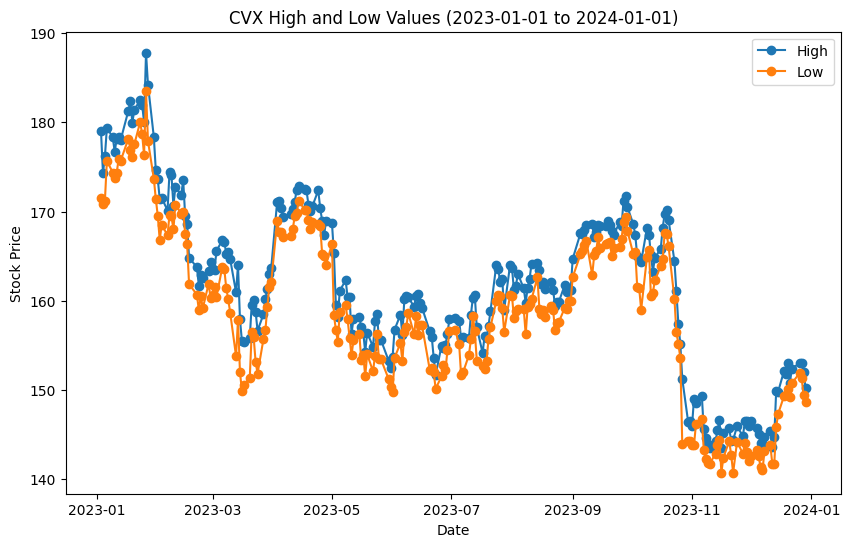

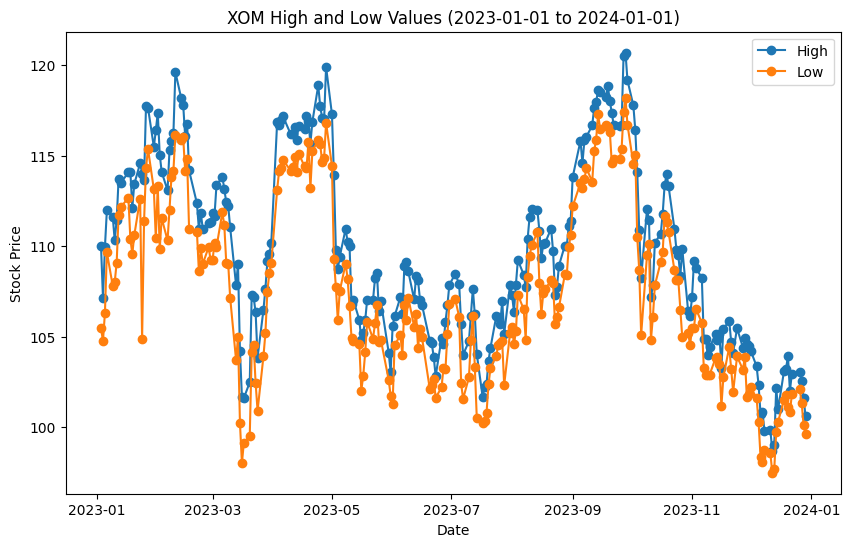

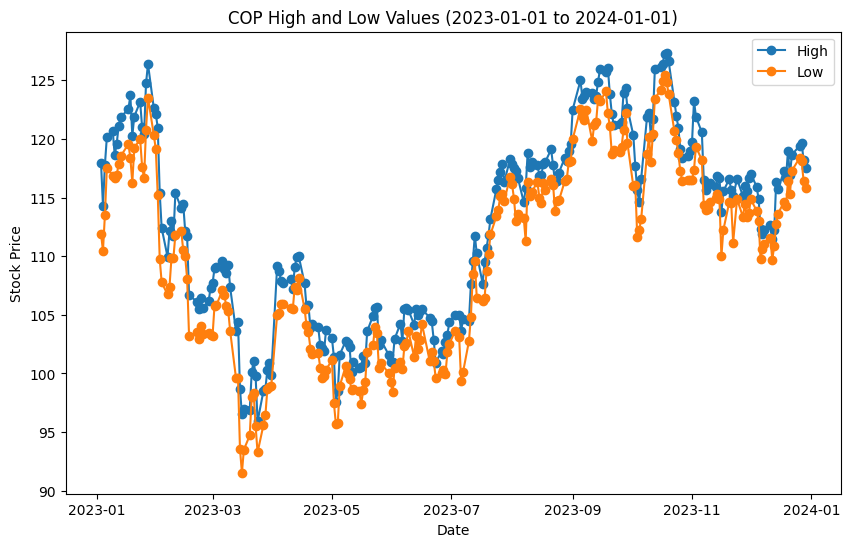

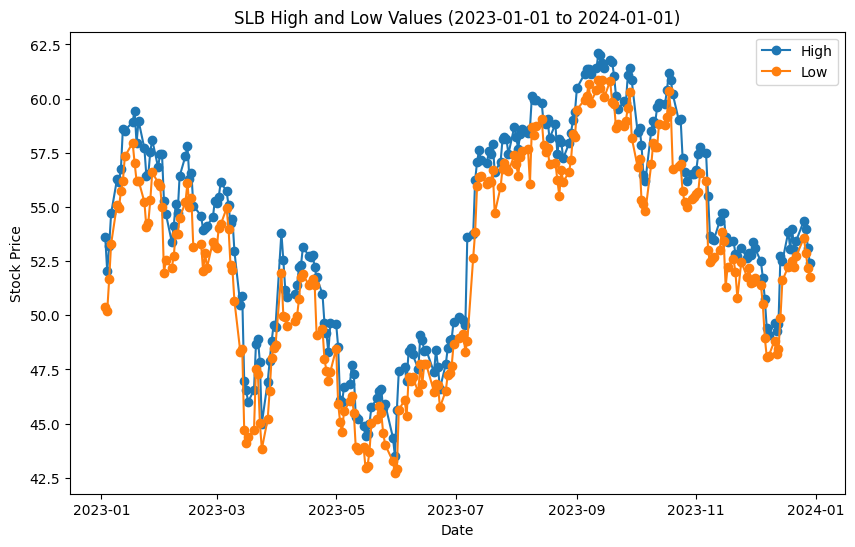

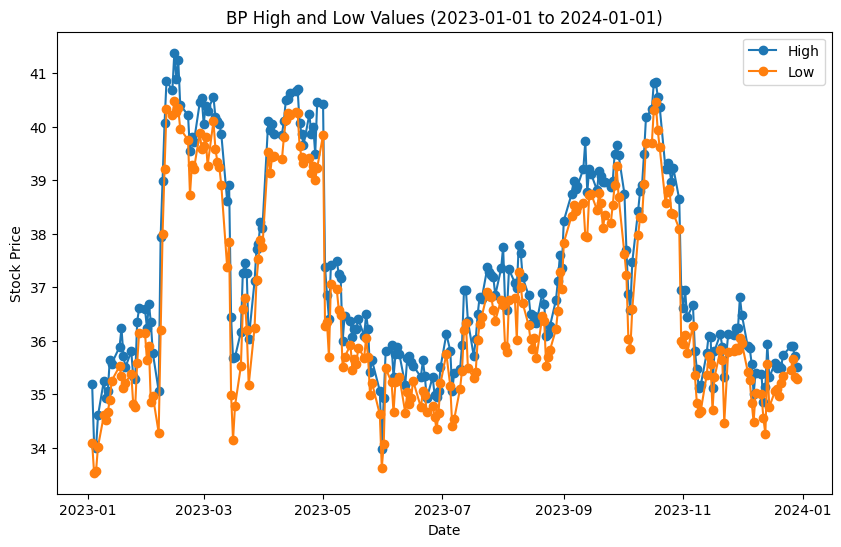

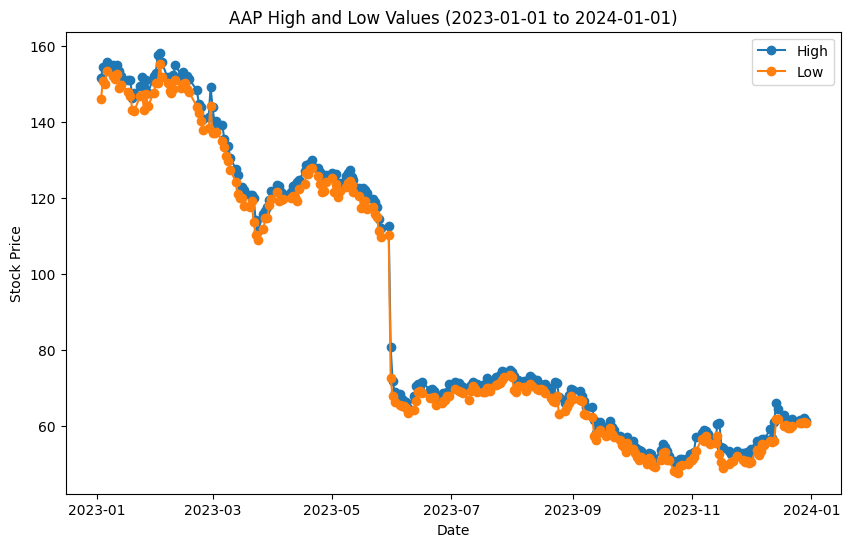

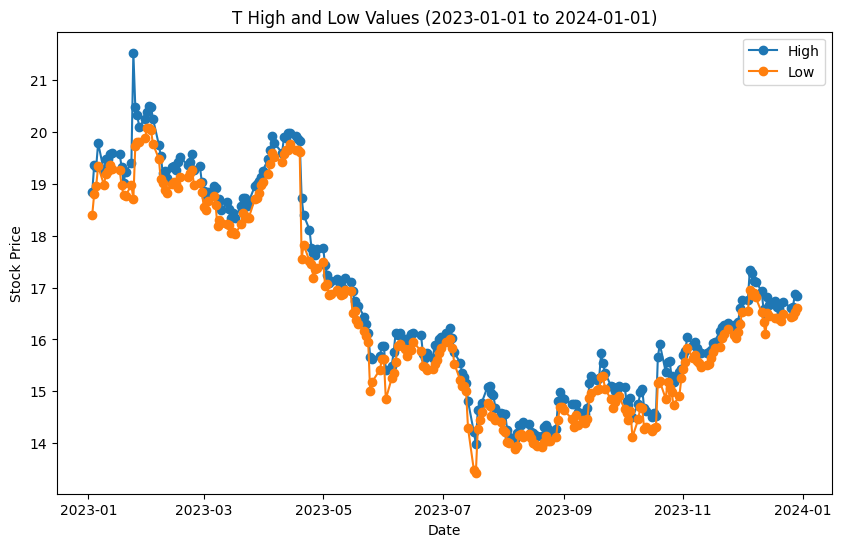

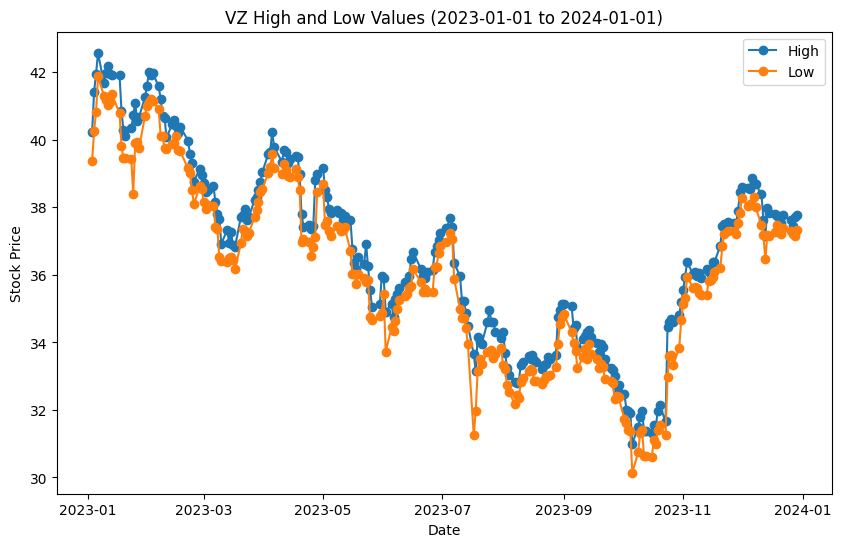

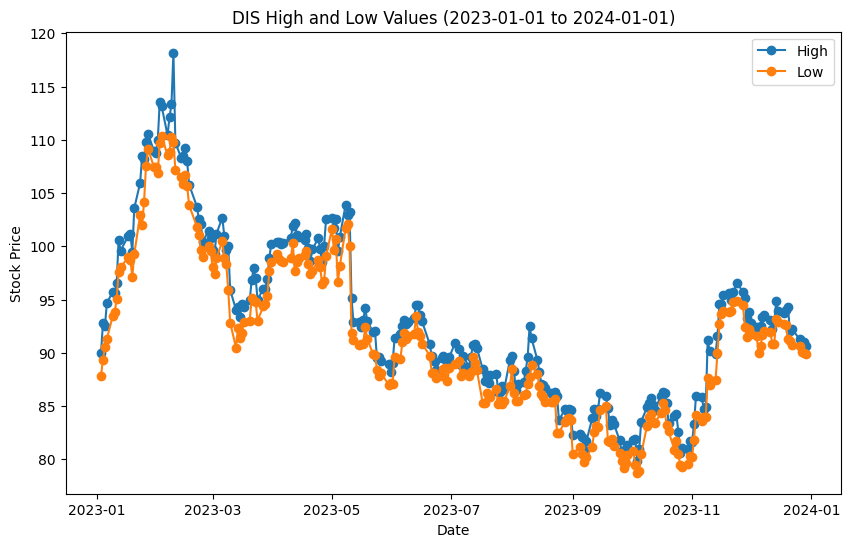

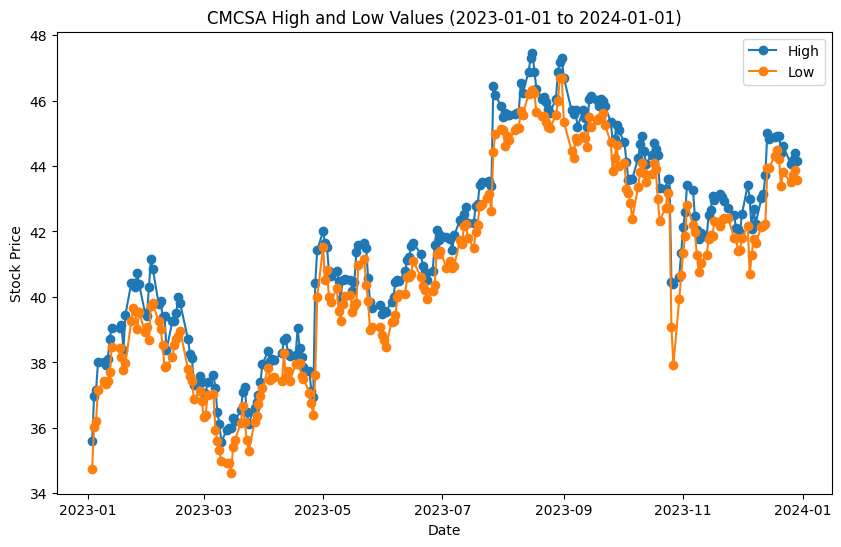

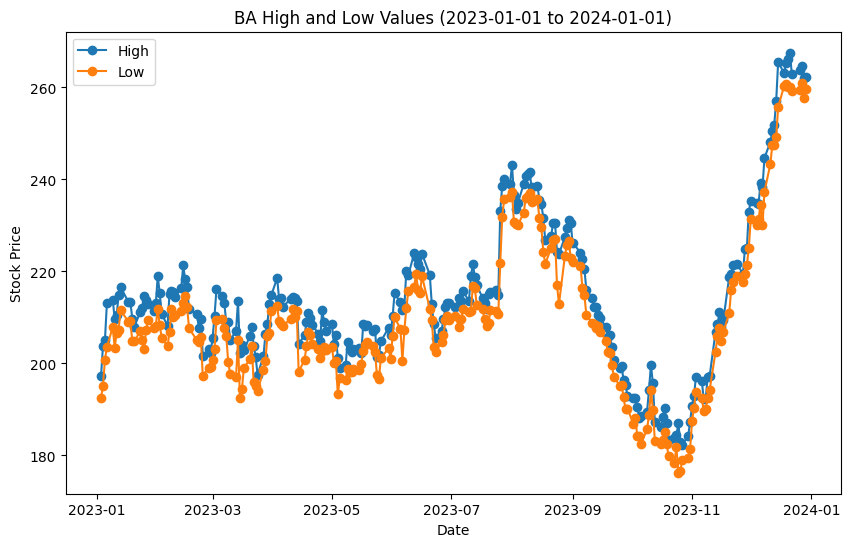

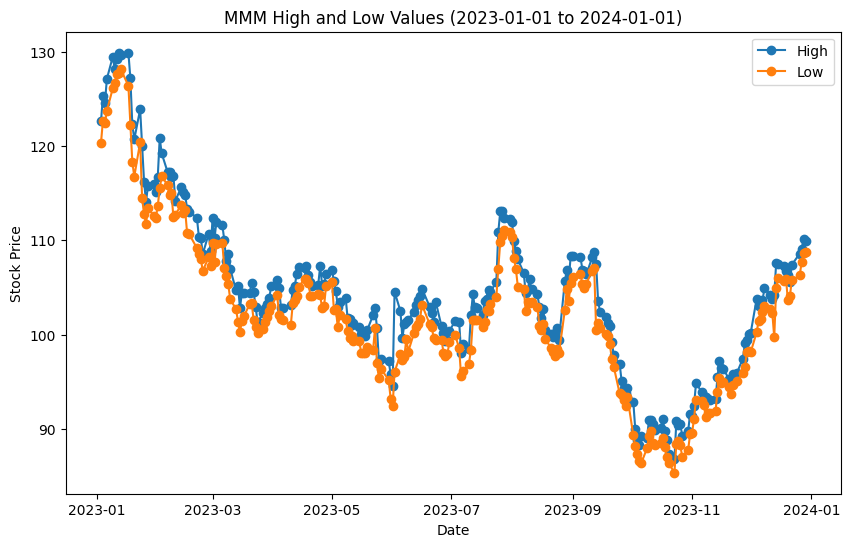

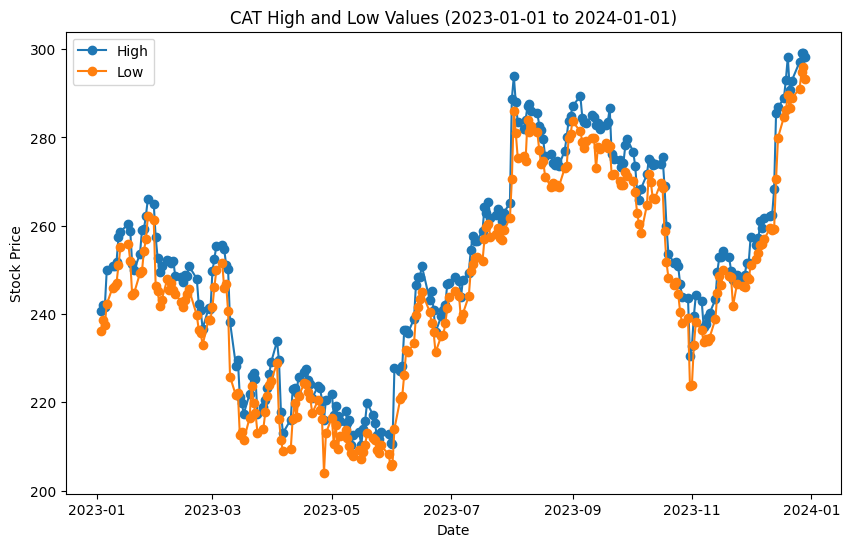

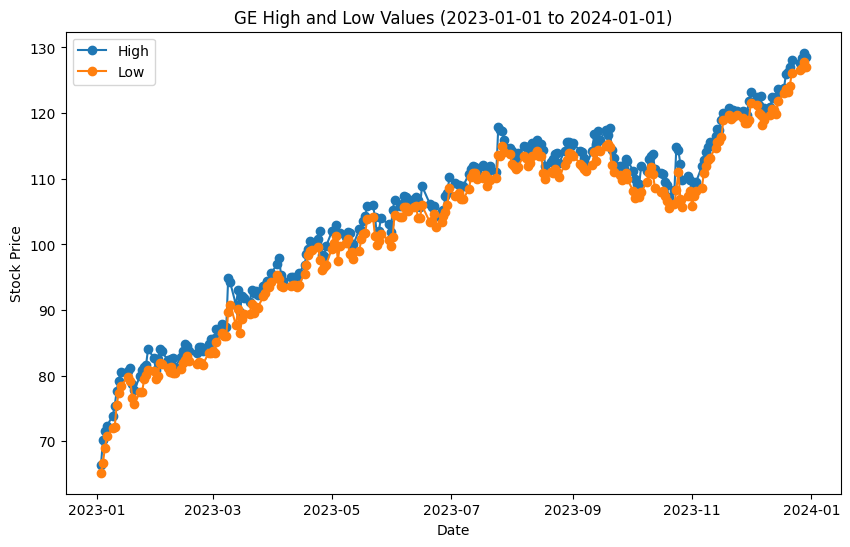

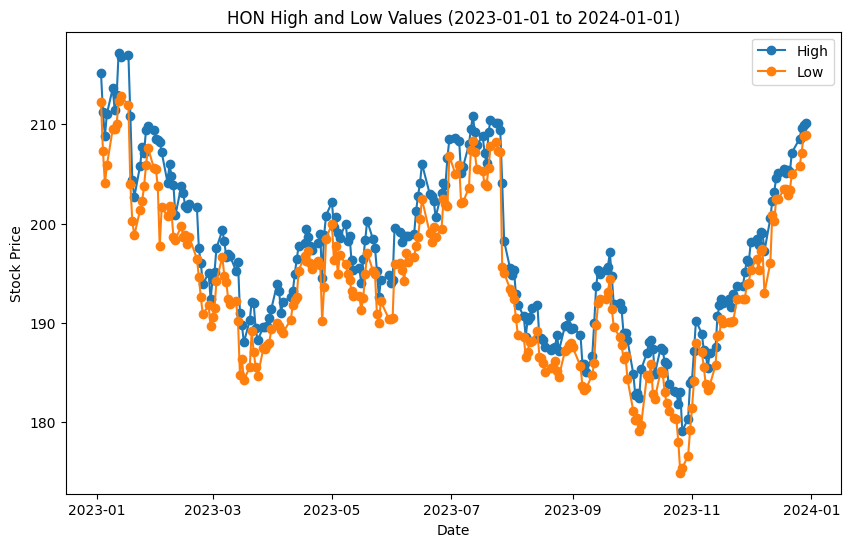

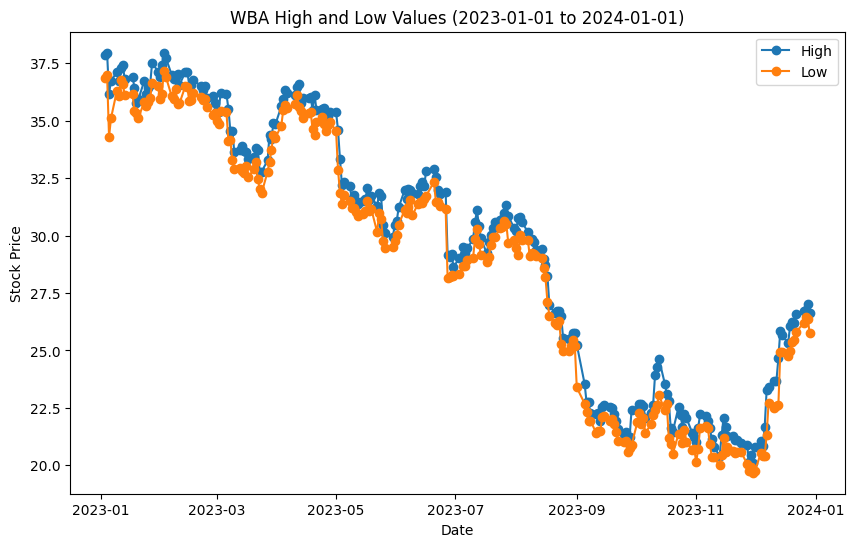

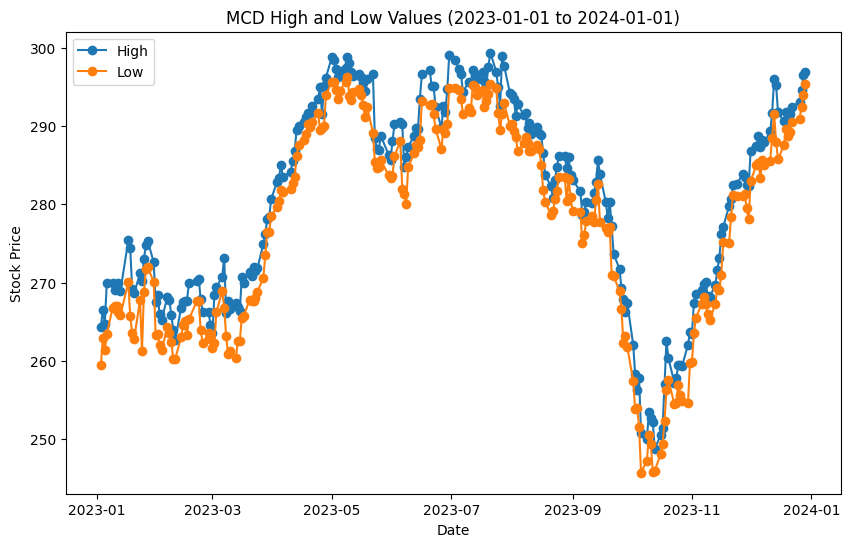

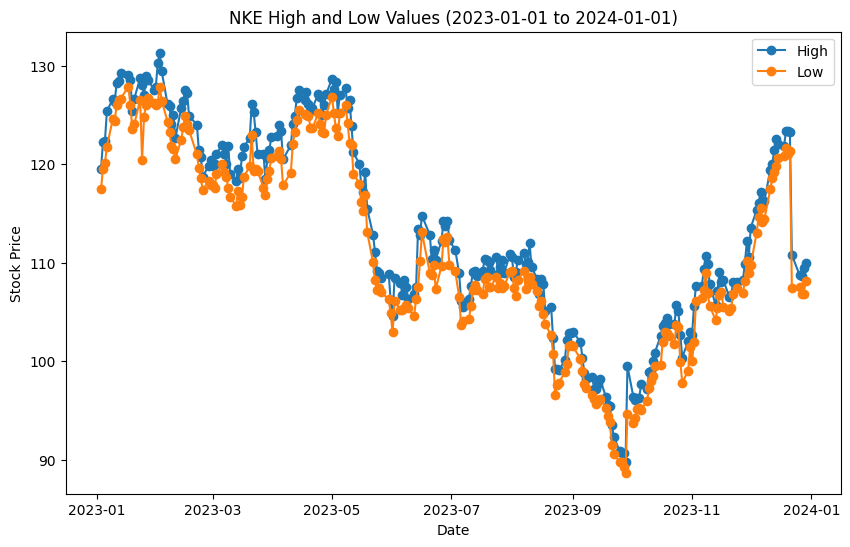

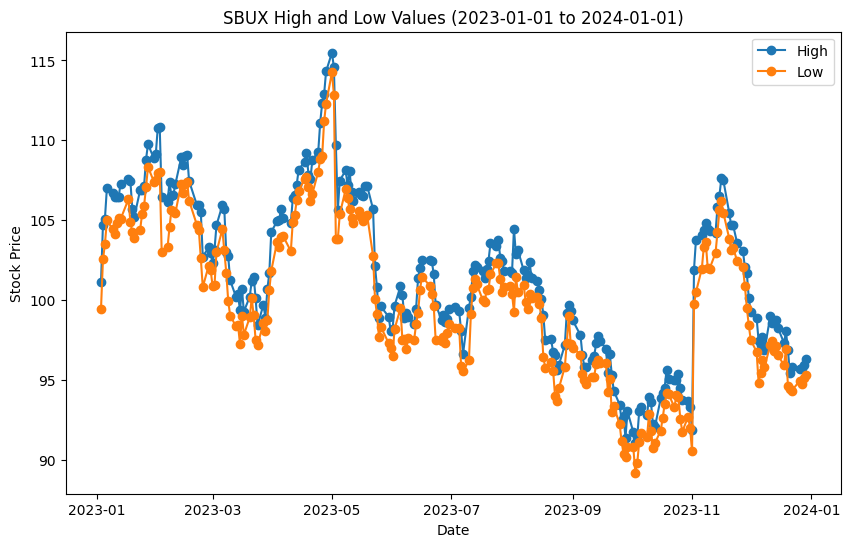

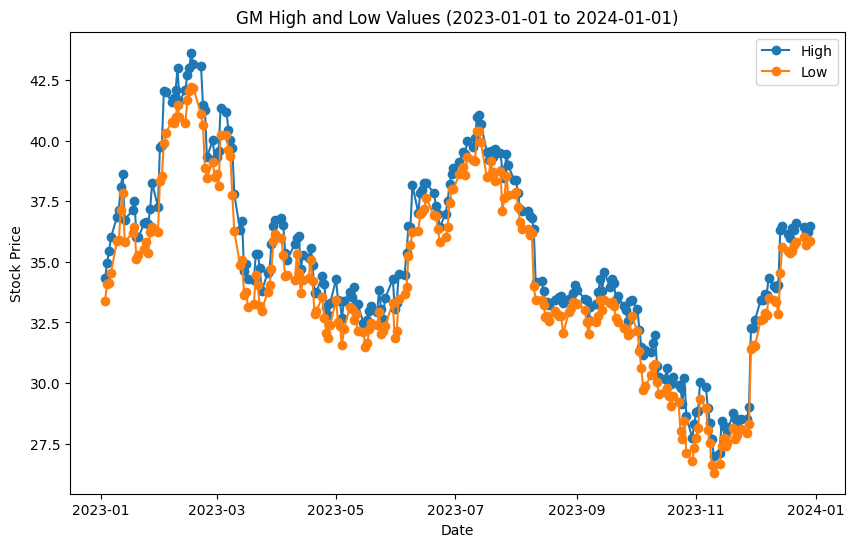

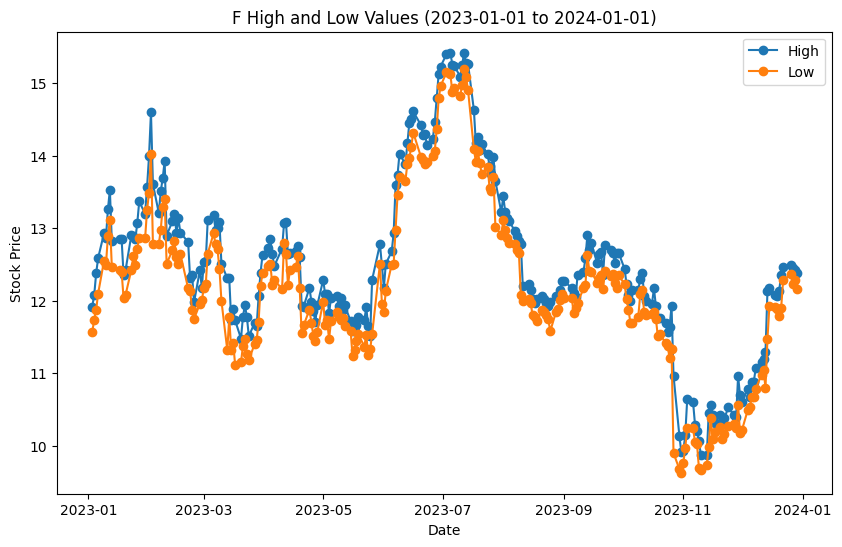

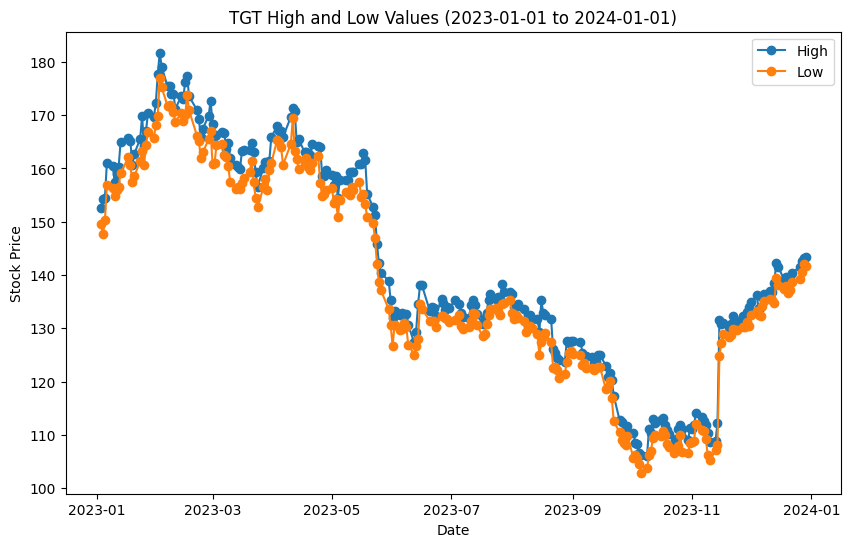

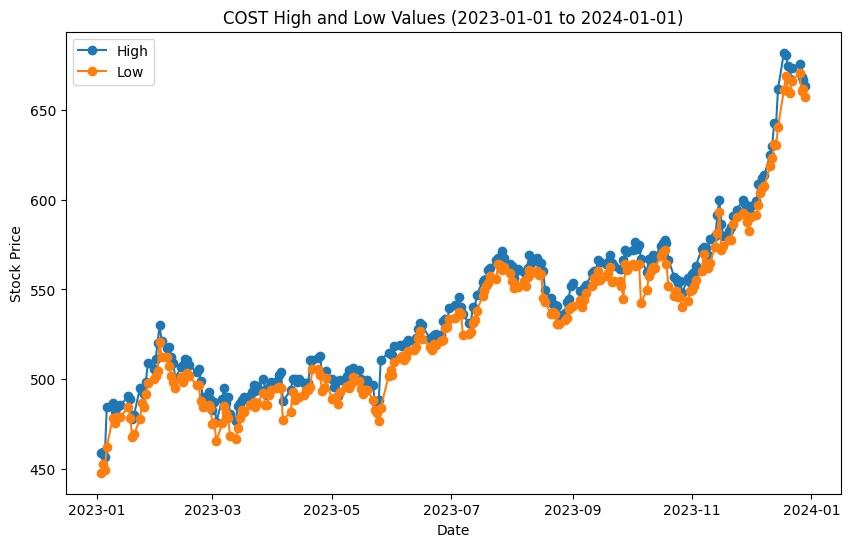

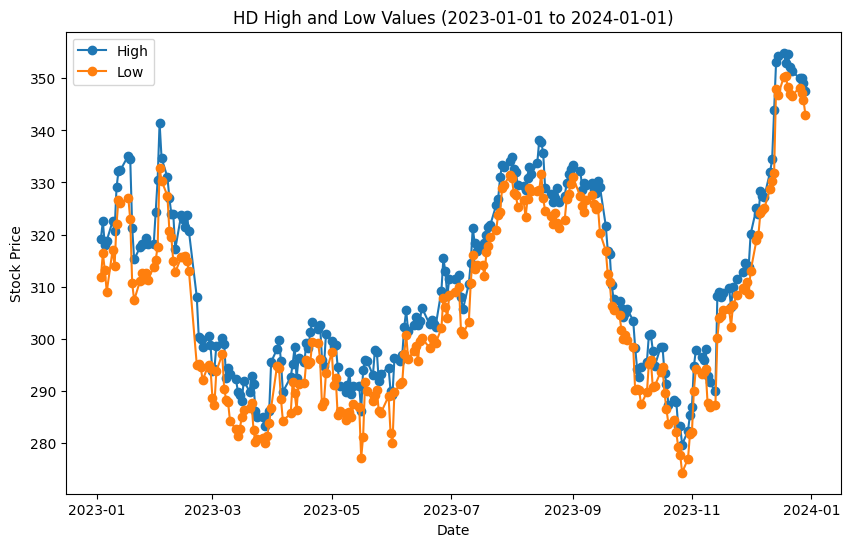

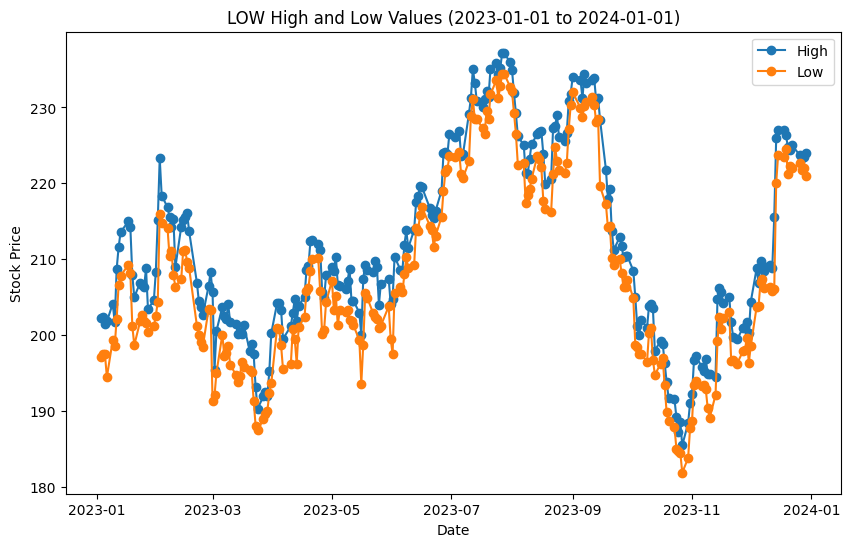

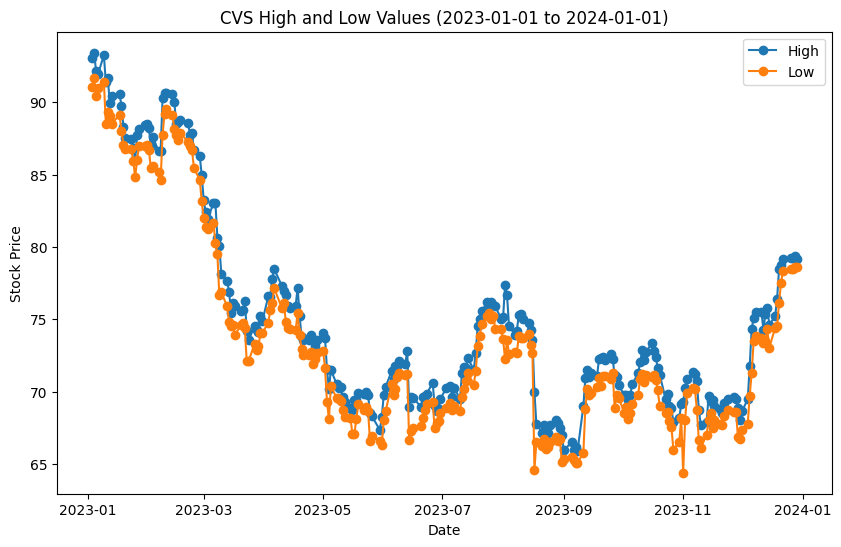

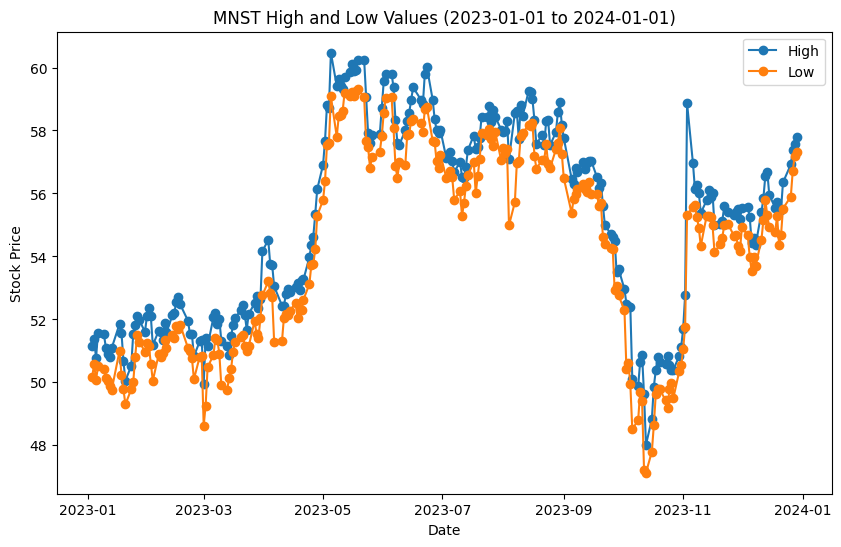

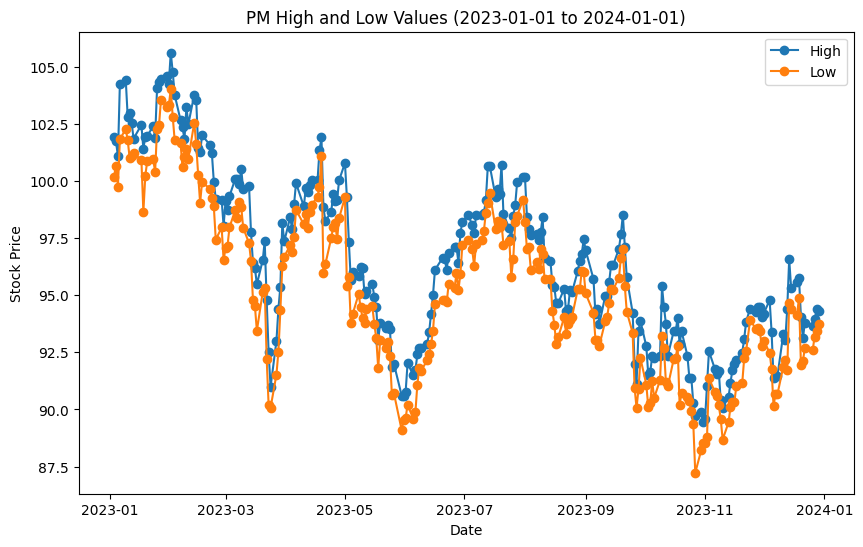

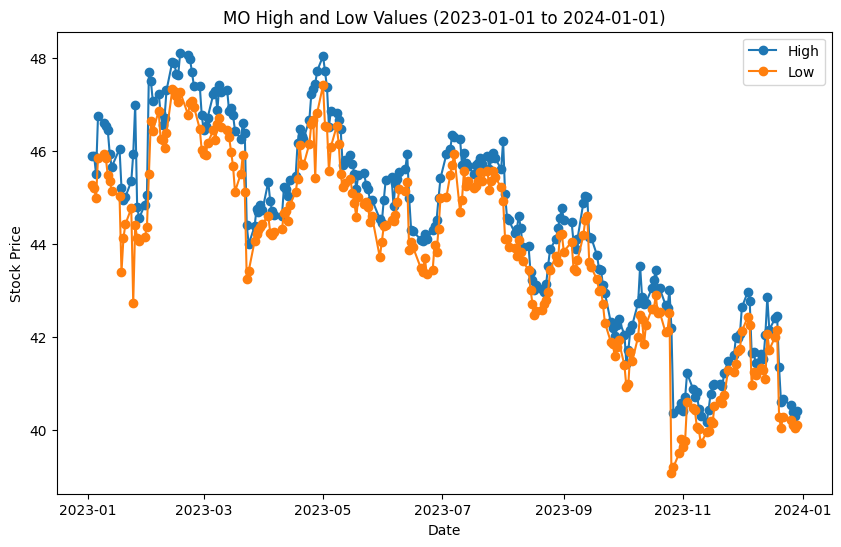

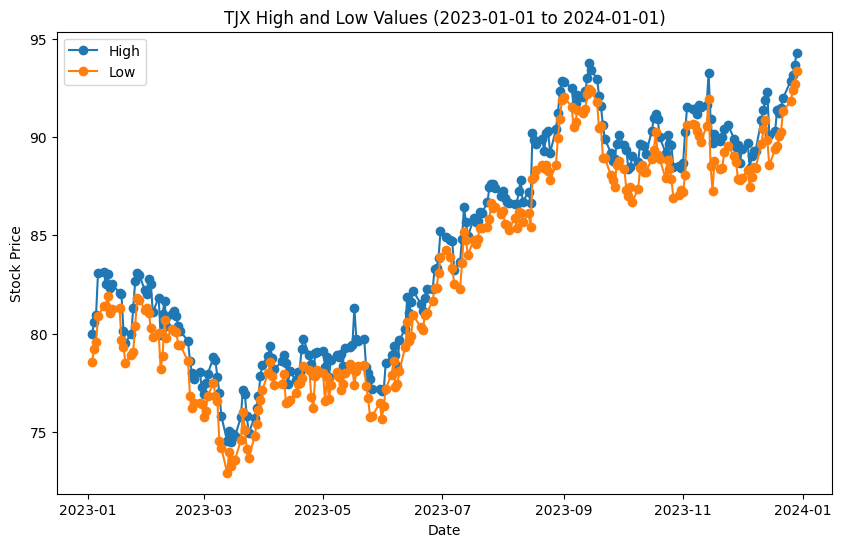

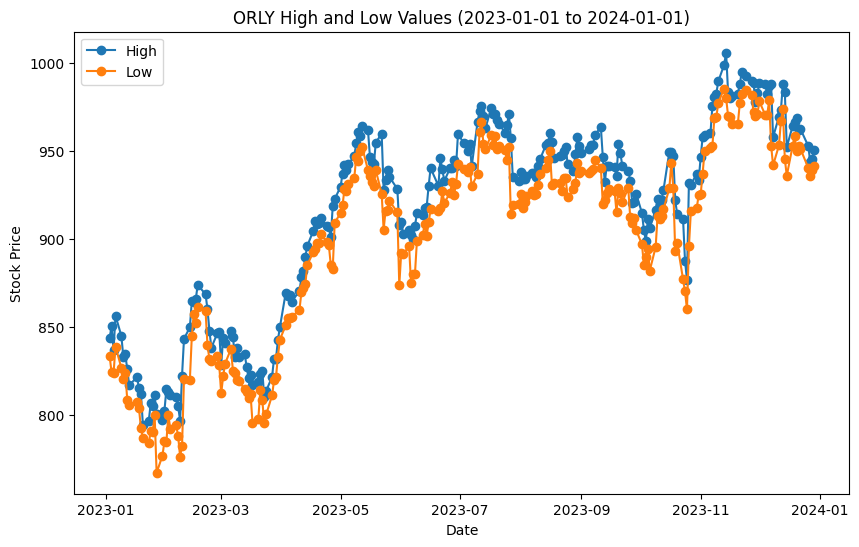

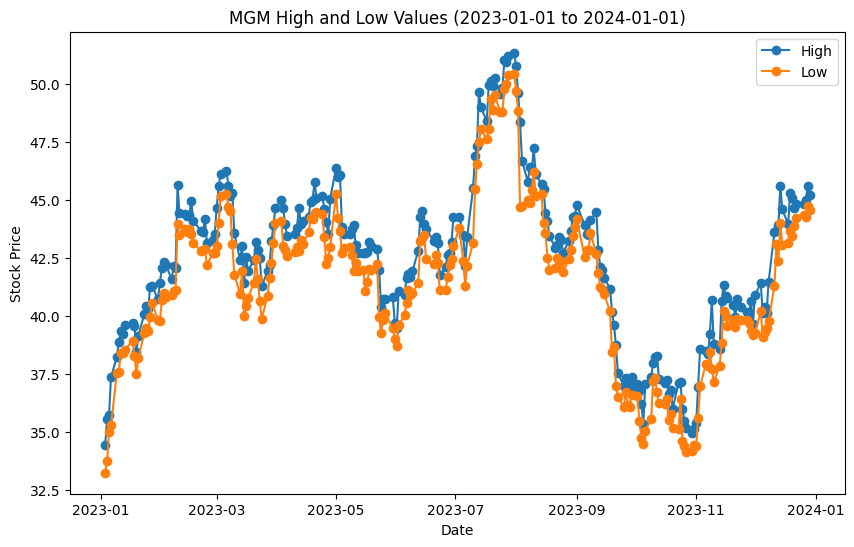

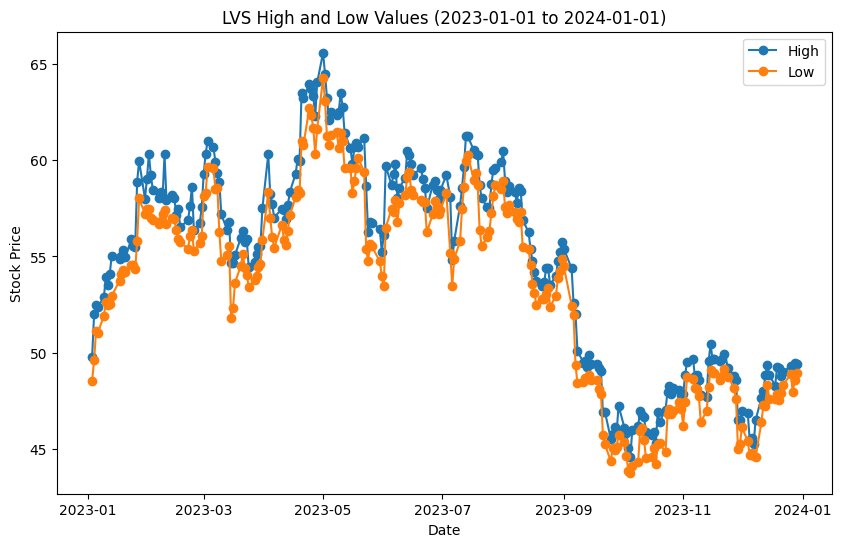

In [ ]:
# Plot high and low values for each stock
for symbol, stock_df in stock_tables.items():
    plt.figure(figsize=(10, 6))
    plt.plot(stock_df.index, stock_df['High'], label='High', marker='o')
    plt.plot(stock_df.index, stock_df['Low'], label='Low', marker='o')
    plt.title(f"{symbol} High and Low Values (2023-01-01 to 2024-01-01)")
    plt.xlabel("Date")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.show()

**seperatibility :-**





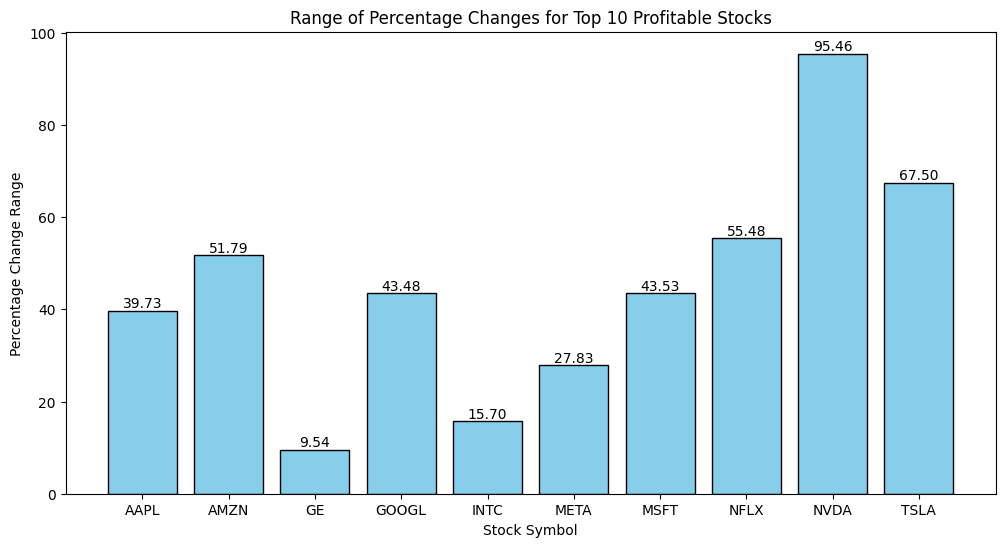

In [ ]:
# Calculate the range of percentage changes for each stock in the top 10 profitable stocks
percentage_change_range_top_10 = stock_data[stock_data['Symbol'].isin(top_10_profitable_symbols)].groupby('Symbol')['Percentage Change'].agg(lambda x: x.max() - x.min())

# Create a bar graph for the range of percentage changes with value annotations
plt.figure(figsize=(12, 6))
bars = plt.bar(percentage_change_range_top_10.index, percentage_change_range_top_10, color='skyblue', edgecolor='black')

# Add value annotations above each bar
for bar, value in zip(bars, percentage_change_range_top_10):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.title("Range of Percentage Changes for Top 10 Profitable Stocks")
plt.xlabel("Stock Symbol")
plt.ylabel("Percentage Change Range")
plt.show()



**top 10 stocks of profitability:-**

Top 10 Most Profitable Stocks:
NVDA: 245.94%
META: 183.76%
TSLA: 129.86%
GE: 92.39%
INTC: 87.99%
AMZN: 77.04%
NFLX: 65.07%
MSFT: 56.96%
GOOGL: 56.74%
AAPL: 53.94%


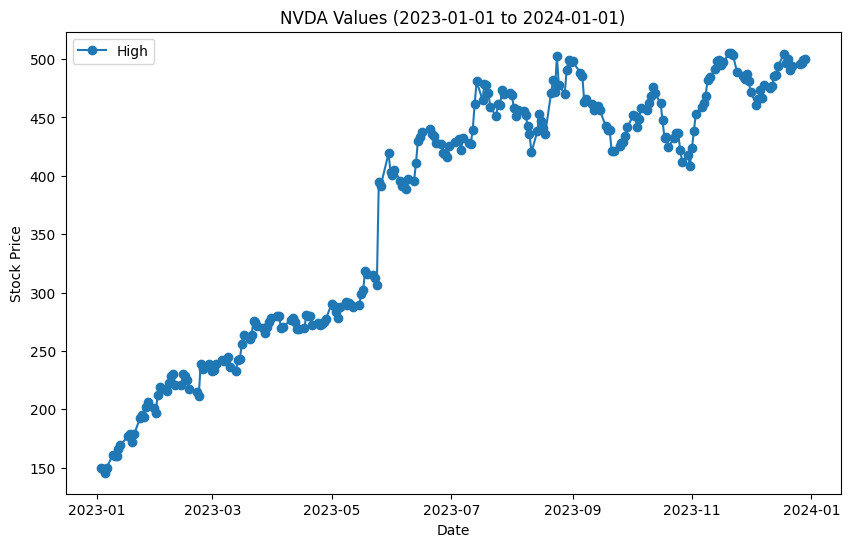

In [ ]:
# Calculate the percentage change in closing prices
profitability = {}
for symbol, stock_df in stock_tables.items():
    start_price = stock_df['Close'].iloc[0]
    end_price = stock_df['Close'].iloc[-1]
    percentage_change = ((end_price - start_price) / start_price) * 100
    profitability[symbol] = percentage_change

# Display the top 10 most profitable stocks
top_10_profitable = sorted(profitability.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 Most Profitable Stocks:")
for symbol, percentage_change in top_10_profitable:
    print(f"{symbol}: {percentage_change:.2f}%")

# Plot high  values for the most profitable stock
most_profitable_stock = top_10_profitable[0][0]
plt.figure(figsize=(10, 6))
plt.plot(stock_tables[most_profitable_stock].index, stock_tables[most_profitable_stock]['High'], label='High', marker='o')
plt.title(f"{most_profitable_stock} Values (2023-01-01 to 2024-01-01)")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

**top 10 stocks with least returns[Loss] over the period**

Top 10 Stocks with Highest Losses:
AAP: -59.73%
PFE: -43.84%
WBA: -29.79%
PYPL: -17.66%
CVS: -15.01%
CVX: -14.27%
JNJ: -12.04%
MO: -11.38%
MMM: -10.74%
T: -10.46%


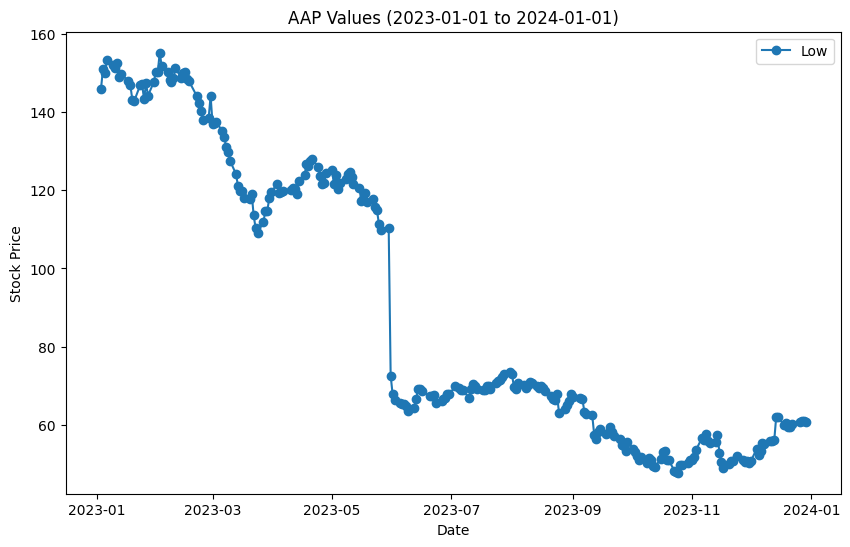

In [ ]:
# Calculate the percentage change in closing prices
losses = {}
for symbol, stock_df in stock_tables.items():
    start_price = stock_df['Close'].iloc[0]
    end_price = stock_df['Close'].iloc[-1]
    percentage_change = ((end_price - start_price) / start_price) * 100
    losses[symbol] = percentage_change

# Display the top 10 stocks with the highest losses
top_10_losses = sorted(losses.items(), key=lambda x: x[1])[:10]

print("Top 10 Stocks with Highest Losses:")
for symbol, percentage_change in top_10_losses:
    print(f"{symbol}: {percentage_change:.2f}%")

# Plot low values for the stock with the highest loss
highest_loss_stock = top_10_losses[0][0]
plt.figure(figsize=(10, 6))

plt.plot(stock_tables[highest_loss_stock].index, stock_tables[highest_loss_stock]['Low'], label='Low', marker='o')
plt.title(f"{highest_loss_stock} Values (2023-01-01 to 2024-01-01)")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

**Risk Ratio For Top 10 High profit Stocks**

Top 10 Most Profitable Stocks (Profit-to-Risk Ratio):
GE: 0.1803
META: 0.1791
NVDA: 0.1783
AAPL: 0.1460
COST: 0.1414
MSFT: 0.1246
AMZN: 0.1207
INTC: 0.1205
TSLA: 0.1174
GOOGL: 0.1039


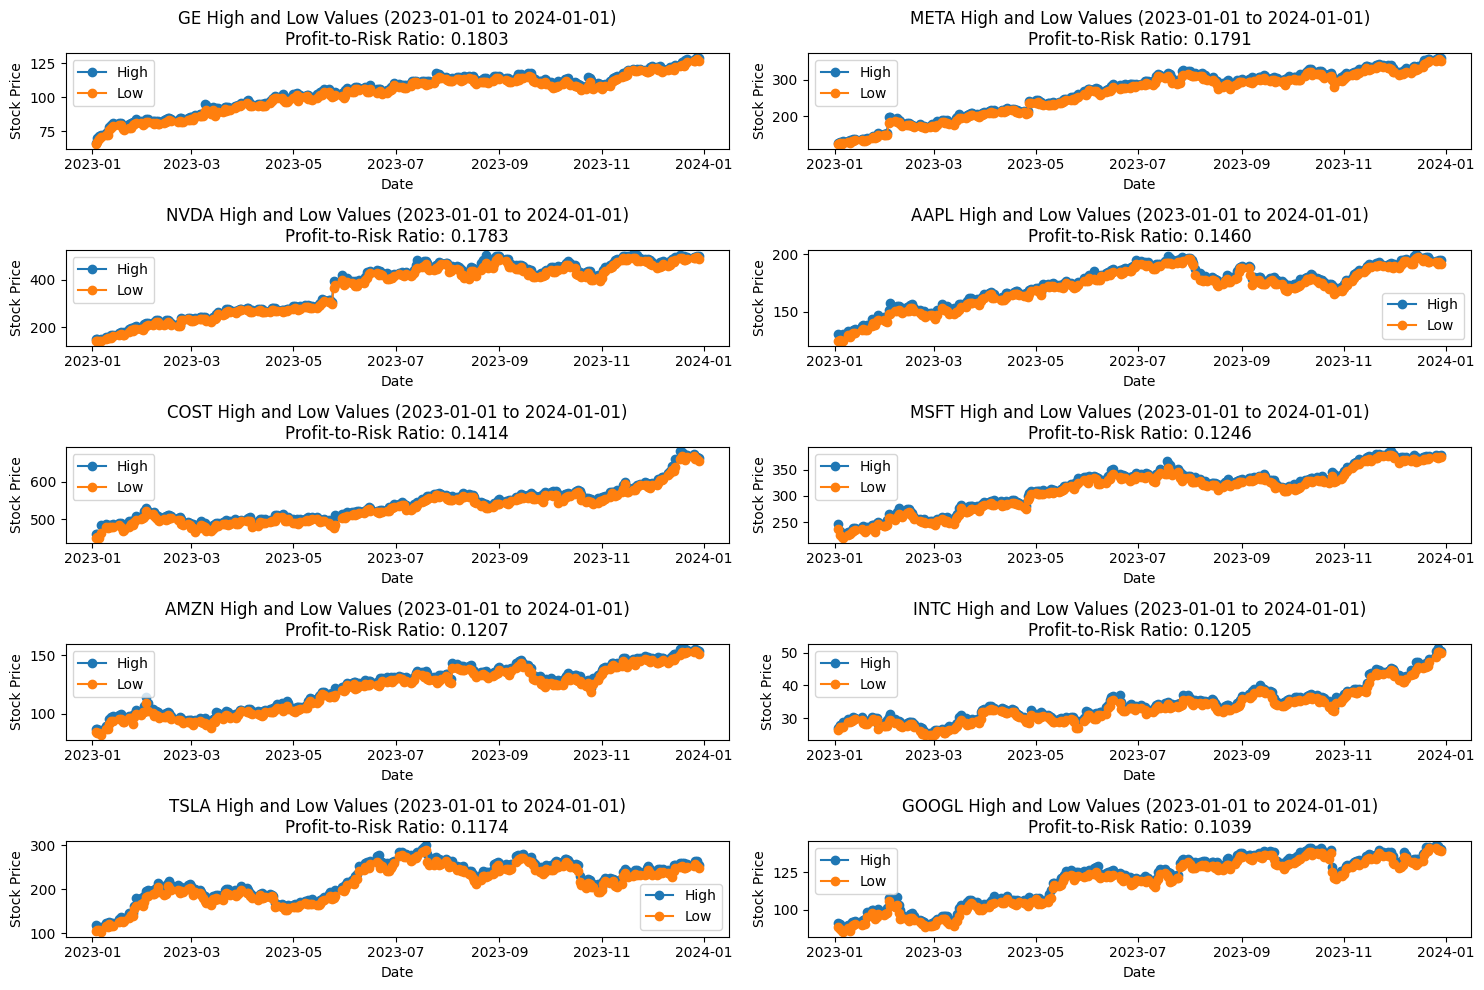

In [ ]:
# Calculate the daily returns for each stock
returns = pd.DataFrame()
for symbol, stock_df in stock_tables.items():
    returns[symbol] = stock_df['Adj Close'].pct_change()

# Calculate the profit-to-risk ratio for each stock
profit_to_risk_ratios = {}
for symbol in stock_symbols:
    mean_return = returns[symbol].mean()
    std_dev = returns[symbol].std()
    profit_to_risk_ratio = mean_return / std_dev
    profit_to_risk_ratios[symbol] = profit_to_risk_ratio

# Display the top 10 most profitable stocks based on the profit-to-risk ratio
top_10_profitable_separability = sorted(profit_to_risk_ratios.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 Most Profitable Stocks (Profit-to-Risk Ratio):")
for symbol, ratio in top_10_profitable_separability:
    print(f"{symbol}: {ratio:.4f}")

# Plot high and low values for each of the top 10 most profitable stocks
plt.figure(figsize=(15, 10))

for i, (symbol, ratio) in enumerate(top_10_profitable_separability):
    plt.subplot(5, 2, i+1)
    plt.plot(stock_tables[symbol].index, stock_tables[symbol]['High'], label='High', marker='o')
    plt.plot(stock_tables[symbol].index, stock_tables[symbol]['Low'], label='Low', marker='o')
    plt.title(f"{symbol} High and Low Values (2023-01-01 to 2024-01-01)\nProfit-to-Risk Ratio: {ratio:.4f}")
    plt.xlabel("Date")
    plt.ylabel("Stock Price")
    plt.legend()

plt.tight_layout()
plt.show()

**Risk Ratio For Least Return Stocks**

Top 10 Stocks with Highest Losses (Profit-to-Risk Ratio):
PFE: -0.1401
AAP: -0.0910
WBA: -0.0433
JNJ: -0.0327
CVS: -0.0263
CVX: -0.0248
PYPL: -0.0224
KO: -0.0123
NKE: -0.0095
MO: -0.0070


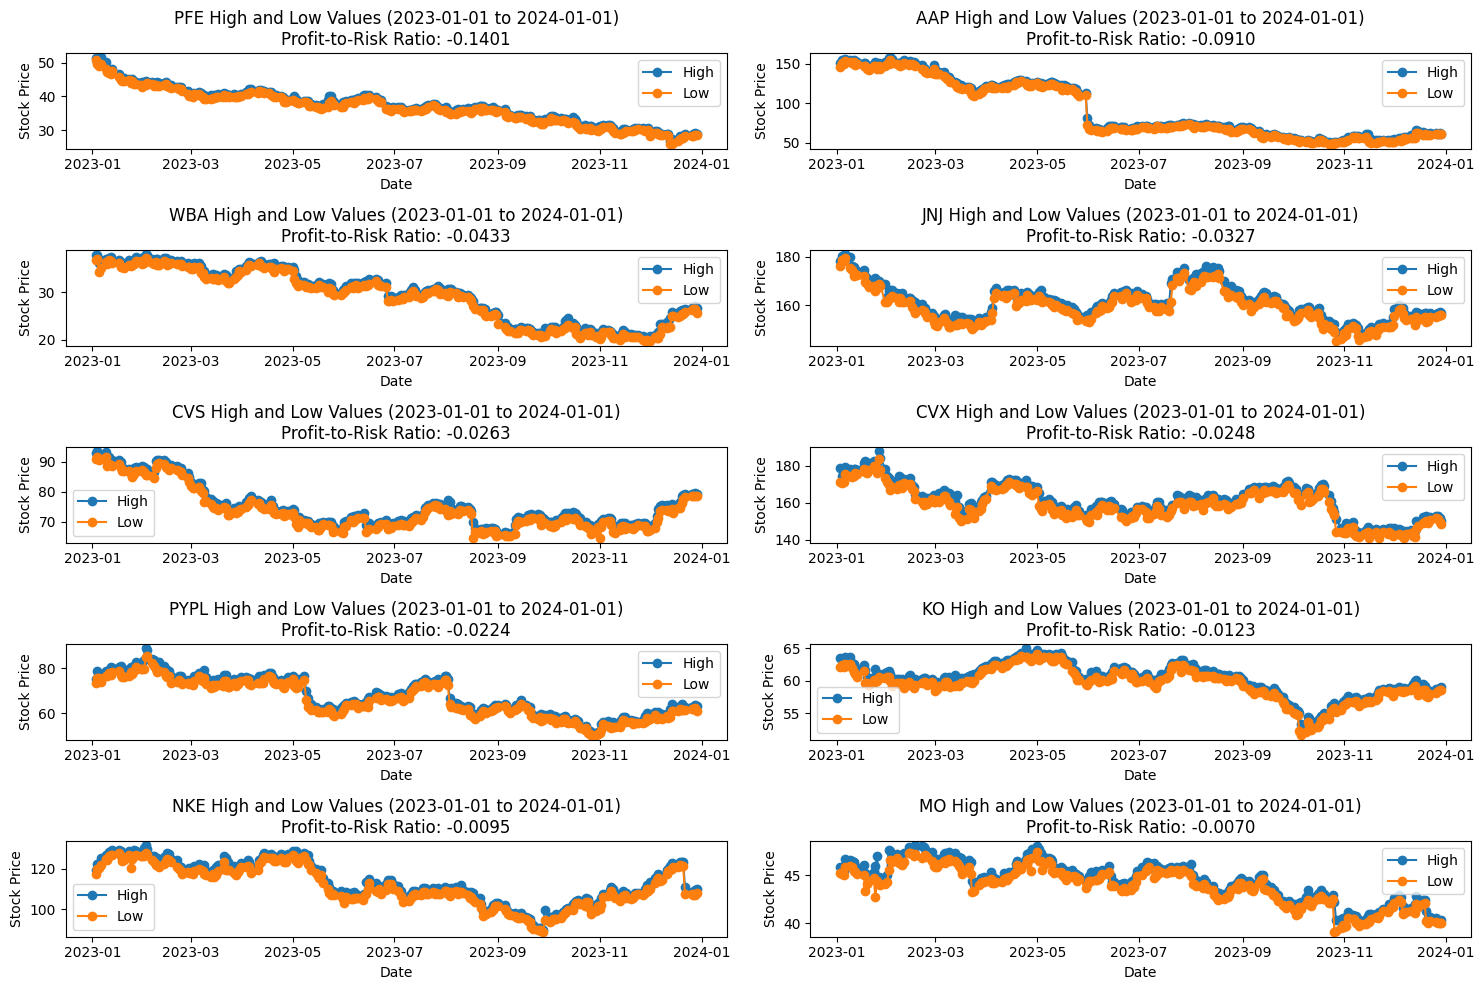

In [ ]:
# Calculate the daily returns for each stock
returns = pd.DataFrame()
for symbol, stock_df in stock_tables.items():
    returns[symbol] = stock_df['Adj Close'].pct_change()

# Calculate the profit-to-risk ratio for each stock
profit_to_risk_ratios = {}
for symbol in stock_symbols:
    mean_return = returns[symbol].mean()
    std_dev = returns[symbol].std()
    profit_to_risk_ratio = mean_return / std_dev
    profit_to_risk_ratios[symbol] = profit_to_risk_ratio

# Display the top 10 stocks with the highest losses based on the profit-to-risk ratio
top_10_losses_separability = sorted(profit_to_risk_ratios.items(), key=lambda x: x[1])[:10]

print("Top 10 Stocks with Highest Losses (Profit-to-Risk Ratio):")
for symbol, ratio in top_10_losses_separability:
    print(f"{symbol}: {ratio:.4f}")

# Plot high and low values for each of the top 10 stocks with the highest losses
plt.figure(figsize=(15, 10))

for i, (symbol, ratio) in enumerate(top_10_losses_separability):
    plt.subplot(5, 2, i+1)
    plt.plot(stock_tables[symbol].index, stock_tables[symbol]['High'], label='High', marker='o')
    plt.plot(stock_tables[symbol].index, stock_tables[symbol]['Low'], label='Low', marker='o')
    plt.title(f"{symbol} High and Low Values (2023-01-01 to 2024-01-01)\nProfit-to-Risk Ratio: {ratio:.4f}")
    plt.xlabel("Date")
    plt.ylabel("Stock Price")
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
pip install networkx


In [ ]:
import networkx as nx

**Correlaation Coefficient**

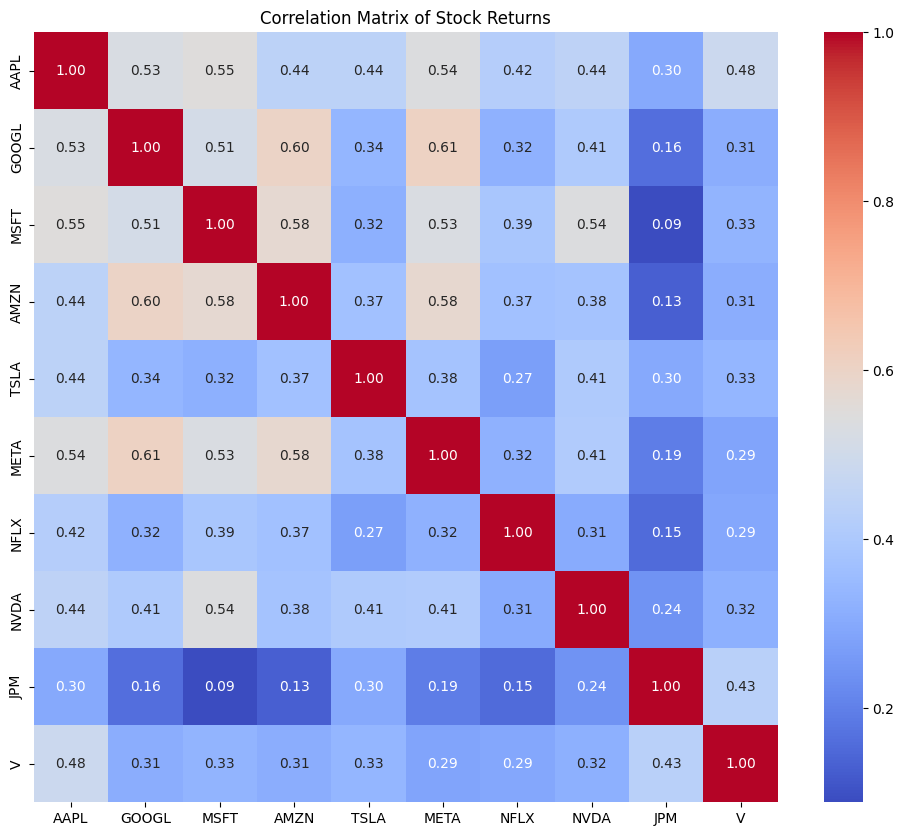

In [ ]:
import seaborn as sns
# Calculate the daily returns for each stock
returns = pd.DataFrame()
for symbol, stock_df in stock_tables.items():
    returns[symbol] = stock_df['Adj Close'].pct_change()

# Calculate the correlation matrix based on the daily returns
correlation_matrix = returns.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Stock Returns")
plt.show()

**GIVE ME Volatility Analysis: FOR TOP 10**

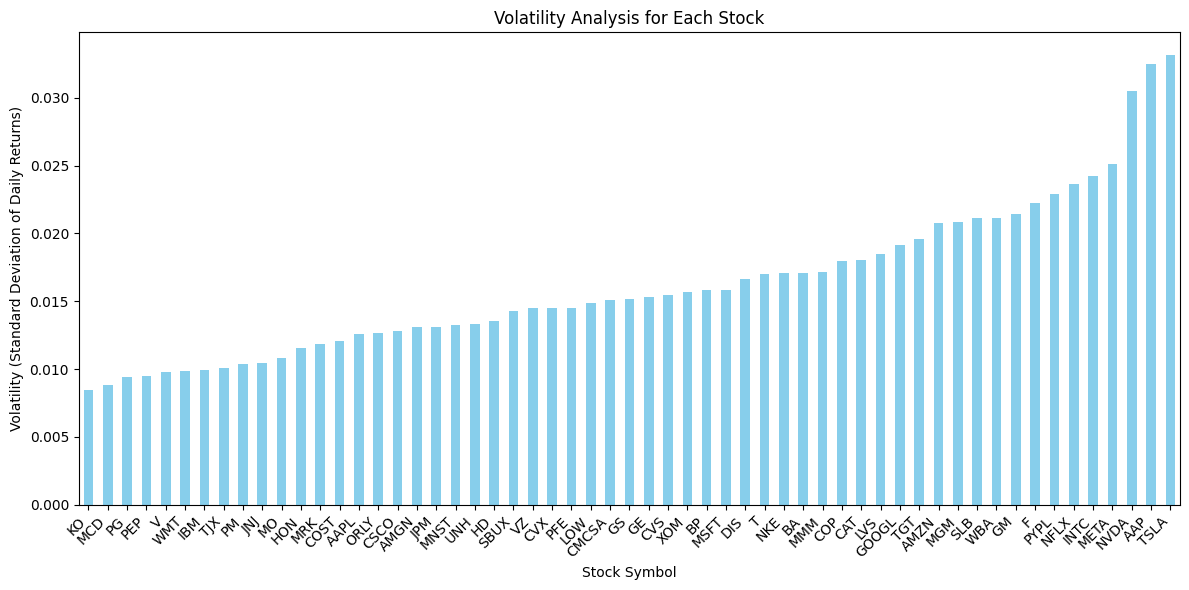

In [ ]:
# Calculate the daily returns for each stock
returns = pd.DataFrame()
for symbol, stock_df in stock_tables.items():
    returns[symbol] = stock_df['Adj Close'].pct_change()

# Calculate volatility as the standard deviation of daily returns
volatility = returns.std()

# Plot volatility for each stock
plt.figure(figsize=(12, 6))
volatility.sort_values().plot(kind='bar', color='skyblue')
plt.title('Volatility Analysis for Each Stock')
plt.xlabel('Stock Symbol')
plt.ylabel('Volatility (Standard Deviation of Daily Returns)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**FINDING MOVING AVERAGE FOR THE STOCK AAPL  JUST ONE**

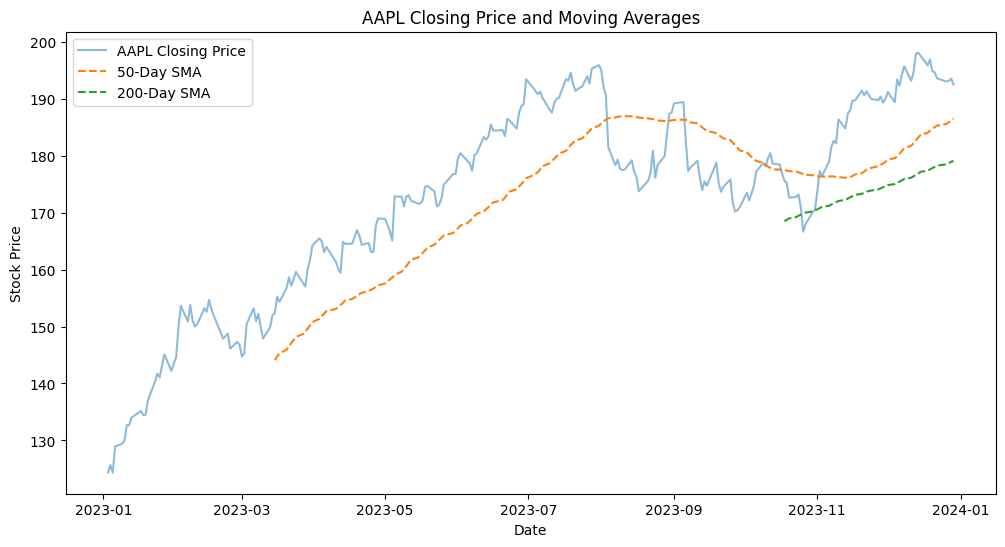

In [ ]:
# Calculate the daily closing prices for each stock
closing_prices = pd.DataFrame({symbol: stock_df['Adj Close'] for symbol, stock_df in stock_tables.items()})

# Calculate the 50-day and 200-day simple moving averages
sma_50 = closing_prices.rolling(window=50).mean()
sma_200 = closing_prices.rolling(window=200).mean()

# Plot the closing prices and moving averages for a specific stock (e.g., AAPL)
plt.figure(figsize=(12, 6))
plt.plot(closing_prices['AAPL'], label='AAPL Closing Price', alpha=0.5)
plt.plot(sma_50['AAPL'], label='50-Day SMA', linestyle='--')
plt.plot(sma_200['AAPL'], label='200-Day SMA', linestyle='--')
plt.title('AAPL Closing Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

**Moving Average For 50 Days**

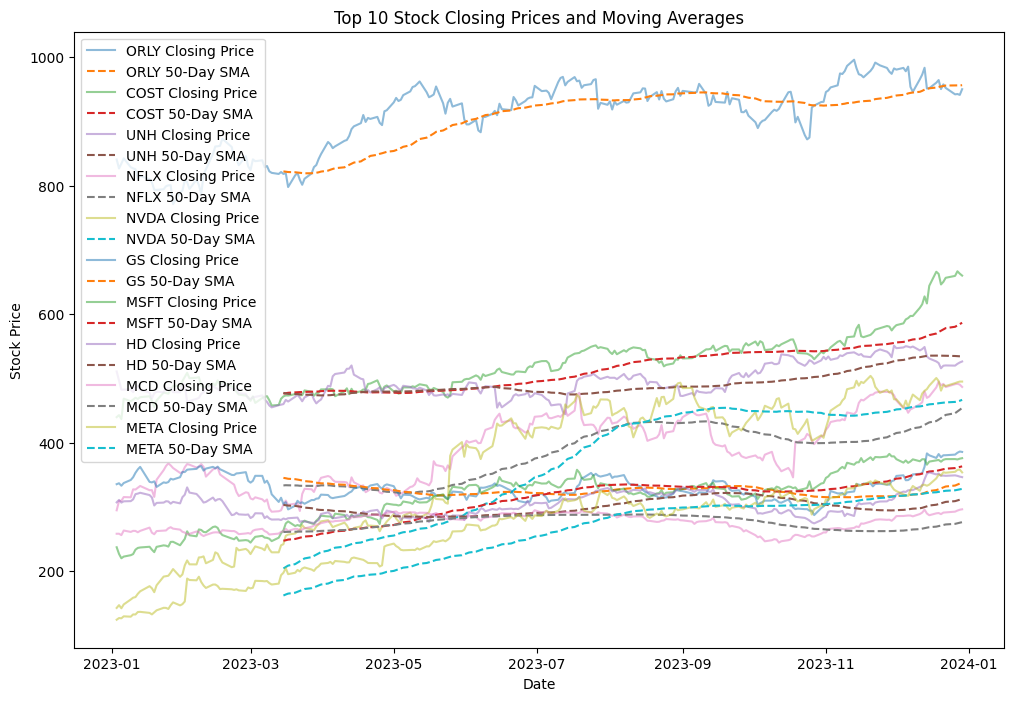

In [ ]:
# Calculate the daily closing prices for each stock
closing_prices = pd.DataFrame({symbol: stock_df['Adj Close'] for symbol, stock_df in stock_tables.items()})

# Calculate the mean closing price to determine the top stocks
mean_closing_price = closing_prices.mean(axis=0)
top_stocks = mean_closing_price.nlargest(10).index

# Plot the closing prices and moving averages for the top 10 stocks
plt.figure(figsize=(12, 8))

for symbol in top_stocks:
    sma_50 = closing_prices[symbol].rolling(window=50).mean()
    #sma_200 = closing_prices[symbol].rolling(window=200).mean()

    plt.plot(closing_prices[symbol], label=f'{symbol} Closing Price', alpha=0.5)
    plt.plot(sma_50, label=f'{symbol} 50-Day SMA', linestyle='--')
    #plt.plot(sma_200, label=f'{symbol} 200-Day SMA', linestyle='--')

plt.title('Top 10 Stock Closing Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

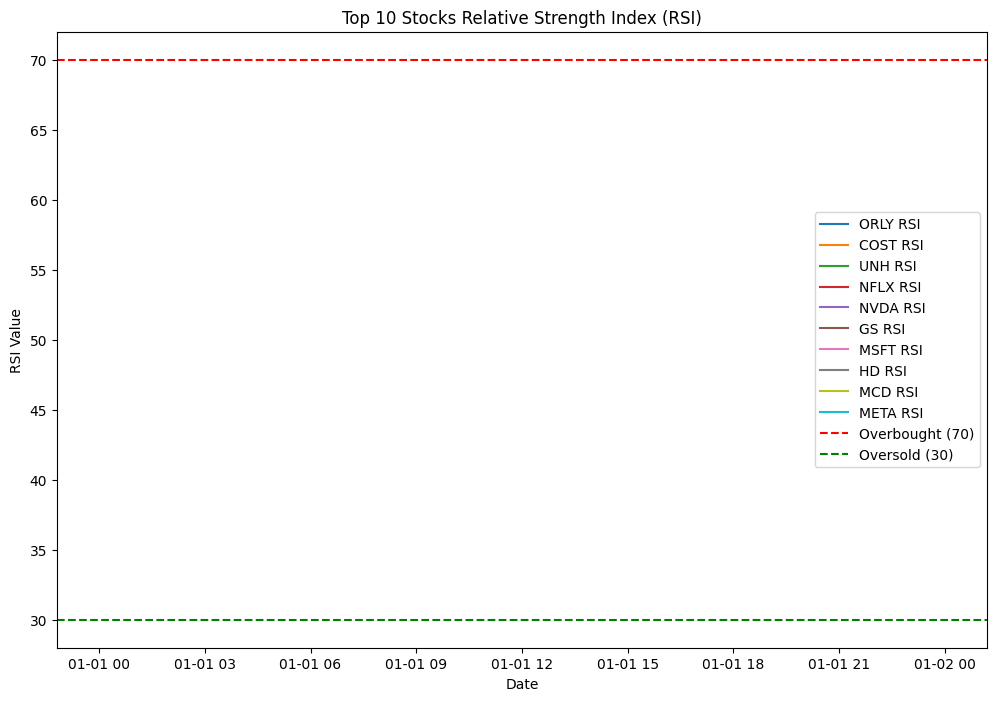

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define a list of stock symbols
stock_symbols = ["AAPL", "GOOGL", "MSFT", "AMZN", "TSLA", "META", "NFLX", "NVDA",
                 "JPM", "V", "PYPL", "GS", "INTC", "CSCO", "IBM", "WMT",
                 "PG", "KO", "PEP", "MRK", "JNJ", "PFE", "UNH", "AMGN",
                 "CVX", "XOM", "COP", "SLB", "BP", "AAP", "T", "VZ",
                 "DIS", "CMCSA", "NFLX", "GOOGL", "AMZN", "TSLA", "NVDA",
                 "BA", "MMM", "CAT", "GE", "HON", "WBA", "MCD", "NKE", "SBUX",
                 "GM", "F", "TGT", "COST", "WMT", "HD", "LOW", "AAP", "CVS",
                 "KO", "PEP", "MNST", "PM", "MO", "SBUX", "KO", "PEP",
                 "TJX", "ORLY", "MGM", "LVS", "AAPL", "MSFT", "GOOGL", "AMZN"]

# Create an empty DataFrame to store the stock data
stock_data = pd.DataFrame()

# Create a dictionary to store stock dataframes
stock_tables = {}

# Loop through the stock symbols and fetch historical data
for symbol in stock_symbols:
    try:
        stock = yf.download(symbol, start="2023-01-01", end="2024-01-01")  # Specify the desired start and end dates
        stock['Symbol'] = symbol  # Add a column for the stock symbol
        stock_data = pd.concat([stock_data, stock], axis=0)

        # Store individual stock dataframe
        stock_tables[symbol] = stock
    except Exception as e:
        print(f"Error fetching data for {symbol}: {e}")

# Calculate the mean closing prices for each stock
mean_closing_prices = stock_data.groupby('Symbol')['Adj Close'].mean()

# Find the top 10 stocks based on mean closing prices
top_10_stocks = mean_closing_prices.nlargest(10).index

# Calculate the daily price changes for each stock
price_changes = pd.DataFrame({symbol: stock_df['Adj Close'].pct_change().dropna() for symbol, stock_df in stock_tables.items()})

# Define the period for RSI calculation
rsi_period = 14

# Calculate the RSI for each stock
rsi_values = {}
for symbol in top_10_stocks:
    average_gain = price_changes[symbol][price_changes[symbol] > 0].rolling(window=rsi_period).mean()
    average_loss = -price_changes[symbol][price_changes[symbol] < 0].rolling(window=rsi_period).mean()
    rs = average_gain / average_loss
    rsi = 100 - (100 / (1 + rs))
    rsi_values[symbol] = rsi

# Plot the RSI for the top 10 stocks
plt.figure(figsize=(12, 8))

for symbol in top_10_stocks:
    plt.plot(rsi_values[symbol], label=f'{symbol} RSI')

plt.axhline(y=70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(y=30, color='green', linestyle='--', label='Oversold (30)')

plt.title('Top 10 Stocks Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.legend()
plt.show()


In [ ]:
!apt-get install openjdk-11-jdk-headless -qq > /dev/null


In [ ]:
!wget "https://downloads.apache.org/kafka/3.6.1/kafka-3.6.1-src.tgz"
!tar -xzf kafka-3.6.1-src.tgz


--2024-01-20 14:22:11--  https://downloads.apache.org/kafka/3.6.1/kafka-3.6.1-src.tgz
Resolving downloads.apache.org (downloads.apache.org)... 135.181.214.104, 88.99.95.219, 2a01:4f9:3a:2c57::2, ...
Connecting to downloads.apache.org (downloads.apache.org)|135.181.214.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11626153 (11M) [application/x-gzip]
Saving to: ‘kafka-3.6.1-src.tgz’

kafka-3.6.1-src.tgz 100%[===================>]  11.09M  9.75MB/s    in 1.1s    

2024-01-20 14:22:13 (9.75 MB/s) - ‘kafka-3.6.1-src.tgz’ saved [11626153/11626153]



In [ ]:
!wget "https://downloads.apache.org/kafka/3.6.1/kafka_2.13-3.6.1.tgz"
!tar -xzf kafka_2.13-3.6.1.tgz

--2024-01-20 21:55:04--  https://downloads.apache.org/kafka/3.6.1/kafka_2.13-3.6.1.tgz
Resolving downloads.apache.org (downloads.apache.org)... 135.181.214.104, 88.99.95.219, 2a01:4f8:10a:201a::2, ...
Connecting to downloads.apache.org (downloads.apache.org)|135.181.214.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113466638 (108M) [application/x-gzip]
Saving to: ‘kafka_2.13-3.6.1.tgz’

kafka_2.13-3.6.1.tg 100%[===================>] 108.21M  24.7MB/s    in 5.2s    

2024-01-20 21:55:09 (20.8 MB/s) - ‘kafka_2.13-3.6.1.tgz’ saved [113466638/113466638]



kafka and zookeeper running

In [ ]:
!./kafka_2.13-3.6.1/bin/zookeeper-server-start.sh -daemon ./kafka_2.13-3.6.1/config/zookeeper.properties
!./kafka_2.13-3.6.1/bin/kafka-server-start.sh -daemon ./kafka_2.13-3.6.1/config/server.properties
!echo "Waiting for 10 secs until kafka and zookeeper services are up and running"
!sleep 10

Waiting for 10 secs until kafka and zookeeper services are up and running


topic creating

In [ ]:
!./kafka_2.13-3.6.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic Faiz-data-train

/bin/bash: line 1: ./kafka_2.13-3.6.1/bin/kafka-topics.sh: No such file or directory


describing

In [ ]:
!./kafka_2.13-3.6.1/bin/kafka-topics.sh --describe --bootstrap-server 127.0.0.1:9092 --topic Faiz-data-train

/bin/bash: line 1: ./kafka_2.13-3.6.1/bin/kafka-topics.sh: No such file or directory


In [ ]:
!pip install kafka-python


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.5/246.5 kB 4.7 MB/s eta 0:00:00


In [ ]:
pip install confluent_kafka


In [ ]:
from kafka import KafkaProducer

# Kafka broker address
bootstrap_servers = 'localhost:9092'

# Create a Kafka producer instance
producer = KafkaProducer(
    bootstrap_servers=bootstrap_servers,
    value_serializer=lambda v: str(v).encode('utf-8')
)

# Define the Kafka topic to which you want to send messages
kafka_topic = 'test-topic'

# Function to send a message to the Kafka topic
def produce_message(message):
    try:
        # Produce the message to the specified topic
        producer.send(kafka_topic, value=message)
        producer.flush()
        print(f"Message sent: {message}")
    except Exception as e:
        print(f"Failed to send message: {e}")

# Example: Send a message to Kafka
produce_message("Hello, Kafka from Colab faiz!")


Message sent: Hello, Kafka from Colab faiz!


In [ ]:
from kafka import KafkaConsumer
import time

# Kafka broker address
bootstrap_servers = 'localhost:9092'

# Define the Kafka topic from which you want to consume messages
kafka_topic = 'test-topic'

# Create a Kafka consumer instance
consumer = KafkaConsumer(
    kafka_topic,
    bootstrap_servers=bootstrap_servers,
    group_id='my-group',
    auto_offset_reset='earliest',  # Adjust as needed: 'earliest' to start from the beginning, 'latest' for new messages
    value_deserializer=lambda x: x.decode('utf-8')
)

# Function to consume messages from the Kafka topic
def consume_messages(timeout_ms=5000):  # Set timeout to 5 seconds (5000 milliseconds)
    start_time = time.time()

    while True:
        # Poll for new messages with a timeout
        messages = consumer.poll(timeout_ms=timeout_ms)

        if not messages:  # No new messages received within the timeout
            print("No new messages. Stopping consumer.")
            break

        for _, message in messages.items():
            for msg in message:
                print(f"Received message: {msg.value}")

    # Close the consumer
    consumer.close()

# Example: Consume messages from Kafka for up to 5 seconds
consume_messages(timeout_ms=5000)


ERROR:kafka.consumer.fetcher:Fetch to node 0 failed: Cancelled: <BrokerConnection node_id=0 host=e061b523ede6:9092 <connected> [IPv4 ('172.28.0.12', 9092)]>


No new messages. Stopping consumer.
